In [24]:
import os, glob, pickle
import numpy as np
from utils.training import train_cplmixVAE
from utils.eval_models import eval_mixmodel
from utils.cluster_analysis import K_selection
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
n_run = 1
n_categories = 20
state_dim = 15
n_arm = 2
tau = .05
fc_dim = 100
latent_dim = 30
lr = 0.001
p_drop = .25
batch_size = 1000
n_epoch = 10000
n_epoch_p = 1000
n_gene = 5622 # 8362
subclass = 'Pvalb'
device = None

In [5]:
data_path = f'./data/AD_MTG_{subclass}_nGene_{n_gene}_nDonor_84.p'
data_path = str(data_path)
path = os.getcwd()
folder_name = f'{subclass}_run_{n_run}_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

In [6]:
models = glob.glob(saving_folder + '/model/cpl_mixVAE_model_*')
cpl_mixVAE, data, sum_dict = eval_mixmodel(n_categories=n_categories, 
                                       state_dim=state_dim, 
                                       n_arm=n_arm,
                                       latent_dim=latent_dim,
                                       fc_dim=fc_dim,
                                       tau=tau,
                                       subclass=subclass,
                                       saving_folder=saving_folder, 
                                       data_path=data_path,
                                       device=device,
                                       models=models)

n_pruning = len(sum_dict['cT_vs_cT'])
with open(saving_folder + f'/sum_dict_{n_pruning}.npy', 'wb') as f:
    np.save(f, sum_dict)
    
f.close()   

loading AD Pvalb data ... 
Data is loaded
['Pvalb_1' 'Pvalb_10' 'Pvalb_12' 'Pvalb_13' 'Pvalb_14' 'Pvalb_15'
 'Pvalb_2' 'Pvalb_3' 'Pvalb_5' 'Pvalb_6' 'Pvalb_7' 'Pvalb_8' 'Pvalb_9']
['UWA 6948' 'UWA 6962' 'UWA 6965' 'UWA 6966' 'UWA 6967' 'UWA 6983'
 'UWA 6989' 'UWA 6991' 'UWA 6992' 'UWA 6993' 'UWA 6997' 'UWA 6999'
 'UWA 7000' 'UWA 7017' 'UWA 7027' 'UWA 7028' 'UWA 7038' 'UWA 7041'
 'UWA 7043' 'UWA 7045' 'UWA 7048' 'UWA 7049' 'UWA 7051' 'UWA 7055'
 'UWA 7056' 'UWA 7058' 'UWA 7063' 'UWA 7064' 'UWA 7065' 'UWA 7067'
 'UWA 7100' 'UWA 7101' 'UWA 7113' 'UWA 7117' 'UWA 7119' 'UWA 7120'
 'UWA 7124' 'UWA 7128' 'UWA 7129' 'UWA 7136' 'UWA 7138' 'UWA 7144'
 'UWA 7146' 'UWA 7150' 'UWA 7152' 'UWA 7153' 'UWA 7157' 'UWA 7159'
 'UWA 7161' 'UWA 7163' 'UWA 7170' 'UWA 7175' 'UWA 7179' 'UWA 7181'
 'UWA 7182' 'UWA 7183' 'UWA 7184' 'UWA 7186' 'UWA 7188' 'UWA 7197'
 'UWA 7227' 'UWA 7237' 'UWA 7239' 'UWA 7240' 'UWA 7244' 'UWA 7245'
 'UWA 7251' 'UWA 7264' 'UWA 7267' 'UWA 7268' 'UWA 7285' 'UWA 7288'
 'UWA 7290' 'UWA

/Users/yeganeh.marghi/github/cplmix_AD/results/cpl_mixVAE/Pvalb_run_1_K_20_Sdim_15_ngene_5622_fcDim_100_latDim_30_lr_0.001_pDrop_0.25_n_arm_2_tau_0.05_bsize_1000_nepoch_10000_nepochP_1000/model/model_eval


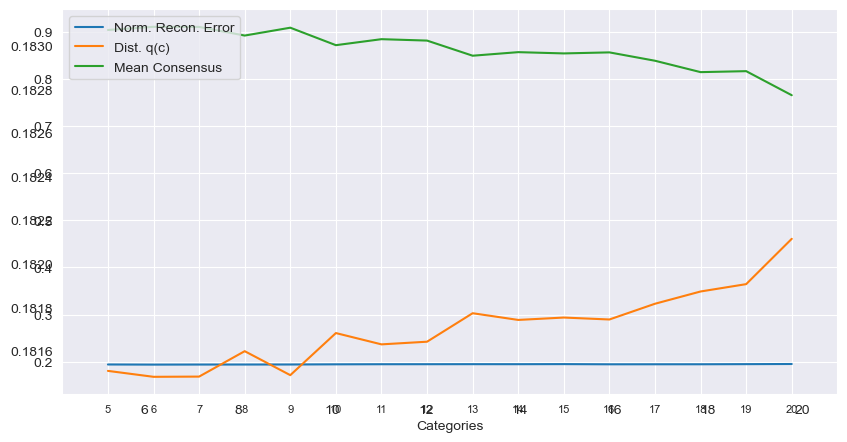

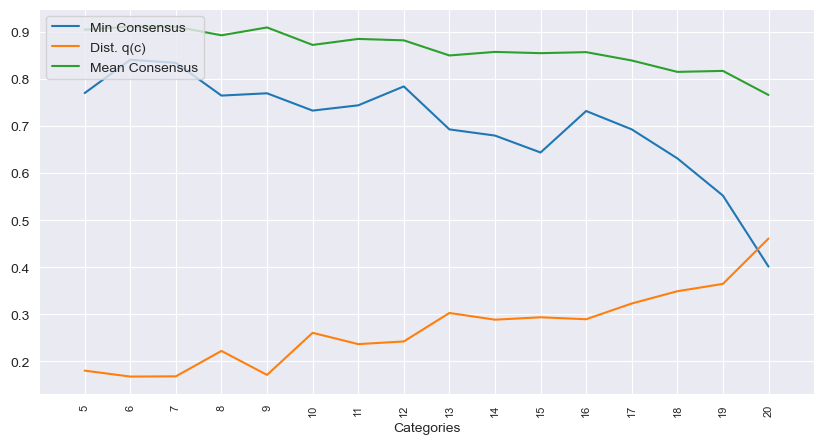

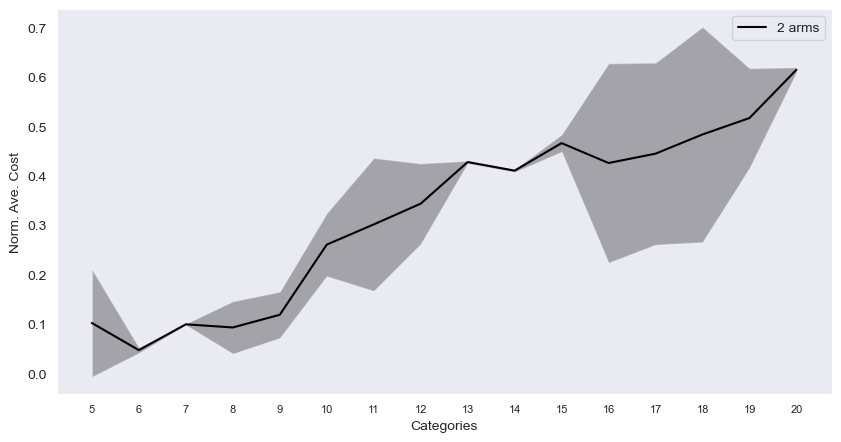

ValueError: too many values to unpack (expected 2)

In [7]:
fig1, fig2 = K_selection(sum_dict, n_categories, n_arm, n_gene)

In [57]:
model_order = 7 
selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_after_pruning_' + str(n_categories - model_order) + '*')[0]
# selected_model = glob.glob(saving_folder + '/model/cpl_mixVAE_model_before_pruning_*')[0]
cpl_mixVAE, data, outcome = eval_mixmodel(n_categories=n_categories, 
                           state_dim=state_dim, 
                           n_arm=n_arm,
                           latent_dim=latent_dim,
                           fc_dim=fc_dim,
                           tau=tau,
                           subclass=subclass,
                           saving_folder=saving_folder, 
                           data_path=data_path,
                           all_data=True,
                           device=device,
                           models=[selected_model])

loading AD Pvalb data ... 
Data is loaded
['Pvalb_1' 'Pvalb_10' 'Pvalb_12' 'Pvalb_13' 'Pvalb_14' 'Pvalb_15'
 'Pvalb_2' 'Pvalb_3' 'Pvalb_5' 'Pvalb_6' 'Pvalb_7' 'Pvalb_8' 'Pvalb_9']
['UWA 6948' 'UWA 6962' 'UWA 6965' 'UWA 6966' 'UWA 6967' 'UWA 6983'
 'UWA 6989' 'UWA 6991' 'UWA 6992' 'UWA 6993' 'UWA 6997' 'UWA 6999'
 'UWA 7000' 'UWA 7017' 'UWA 7027' 'UWA 7028' 'UWA 7038' 'UWA 7041'
 'UWA 7043' 'UWA 7045' 'UWA 7048' 'UWA 7049' 'UWA 7051' 'UWA 7055'
 'UWA 7056' 'UWA 7058' 'UWA 7063' 'UWA 7064' 'UWA 7065' 'UWA 7067'
 'UWA 7100' 'UWA 7101' 'UWA 7113' 'UWA 7117' 'UWA 7119' 'UWA 7120'
 'UWA 7124' 'UWA 7128' 'UWA 7129' 'UWA 7136' 'UWA 7138' 'UWA 7144'
 'UWA 7146' 'UWA 7150' 'UWA 7152' 'UWA 7153' 'UWA 7157' 'UWA 7159'
 'UWA 7161' 'UWA 7163' 'UWA 7170' 'UWA 7175' 'UWA 7179' 'UWA 7181'
 'UWA 7182' 'UWA 7183' 'UWA 7184' 'UWA 7186' 'UWA 7188' 'UWA 7197'
 'UWA 7227' 'UWA 7237' 'UWA 7239' 'UWA 7240' 'UWA 7244' 'UWA 7245'
 'UWA 7251' 'UWA 7264' 'UWA 7267' 'UWA 7268' 'UWA 7285' 'UWA 7288'
 'UWA 7290' 'UWA

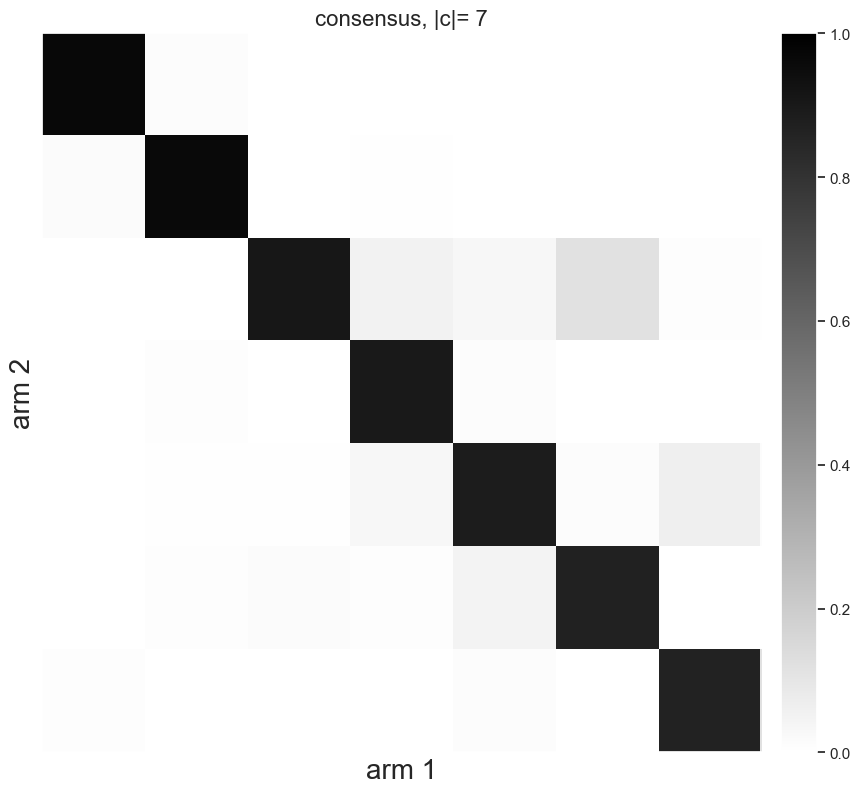

In [58]:
plt.figure(figsize=[10,10])
ax = plt.gca()
im = ax.imshow(outcome['consensus'][0], cmap='binary', vmax=1)
plt.xlabel('arm 1', fontsize=20)
plt.ylabel('arm 2', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.title('consensus, |c|= ' + str(outcome['consensus'][0].shape[0]), fontsize=16)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

In [59]:
outcome.keys()

dict_keys(['q_c', 'recon_loss', 'dz', 'd_qz', 'con_min', 'con_mean', 'num_pruned', 'pred_label', 'cT_vs_cT', 'consensus', 'prune_indx', 'nprune_indx', 'state_mu', 'state_sample', 'state_var', 'sample_id'])

In [60]:
data['supertype_scANVI'] = np.array(data['supertype_scANVI'])
# T_class = np.unique(data['supertype_scANVI'])
uniq_labels = np.unique(data['label'])
color = ['#ADE6A6', '#B8FFCA', '#82AD7D', '#A6E6A9', '#7AE6AB', '#D9F077',
       '#00979D', '#00A79D', '#008F1F', '#53879D', '#2F8C4D', '#33A9CE',
       '#0094C2', '#005C07', '#669D6A', '#00879D', '#00A809', '#26BF64',
       '#00FF00', '#00DDC5', '#26FFF2', '#3D9946', '#008F39', '#73CA95']
data['color'] = np.copy(data['cluster_color'])
uniq_clr, T_class, num_Tclass = [], [], []

for i_type, ttype in enumerate(uniq_labels):
    idx = np.where(data['label'] == ttype)[0]
    data['color'][idx] = color[i_type]
    uniq_clr.append(color[i_type])
    T_class.append(data['supertype_scANVI'][idx[0]])
    num_Tclass.append(len(idx))


T_class = np.array(T_class)
class_reord = np.array([13,8,9,10,11,1,6,2,3,4,5,7,12])
class_reord = (class_reord - 1).astype(int)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['supertype_scANVI'])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
data['c_onehot'] = onehot_encoder.fit_transform(integer_encoded)
data['c_p'] = softmax((data['c_onehot'] + 1e-6) / 0.1, axis=1)


[17 15  8  4 13  3 16]
[17 15  8  4 13  3 16]


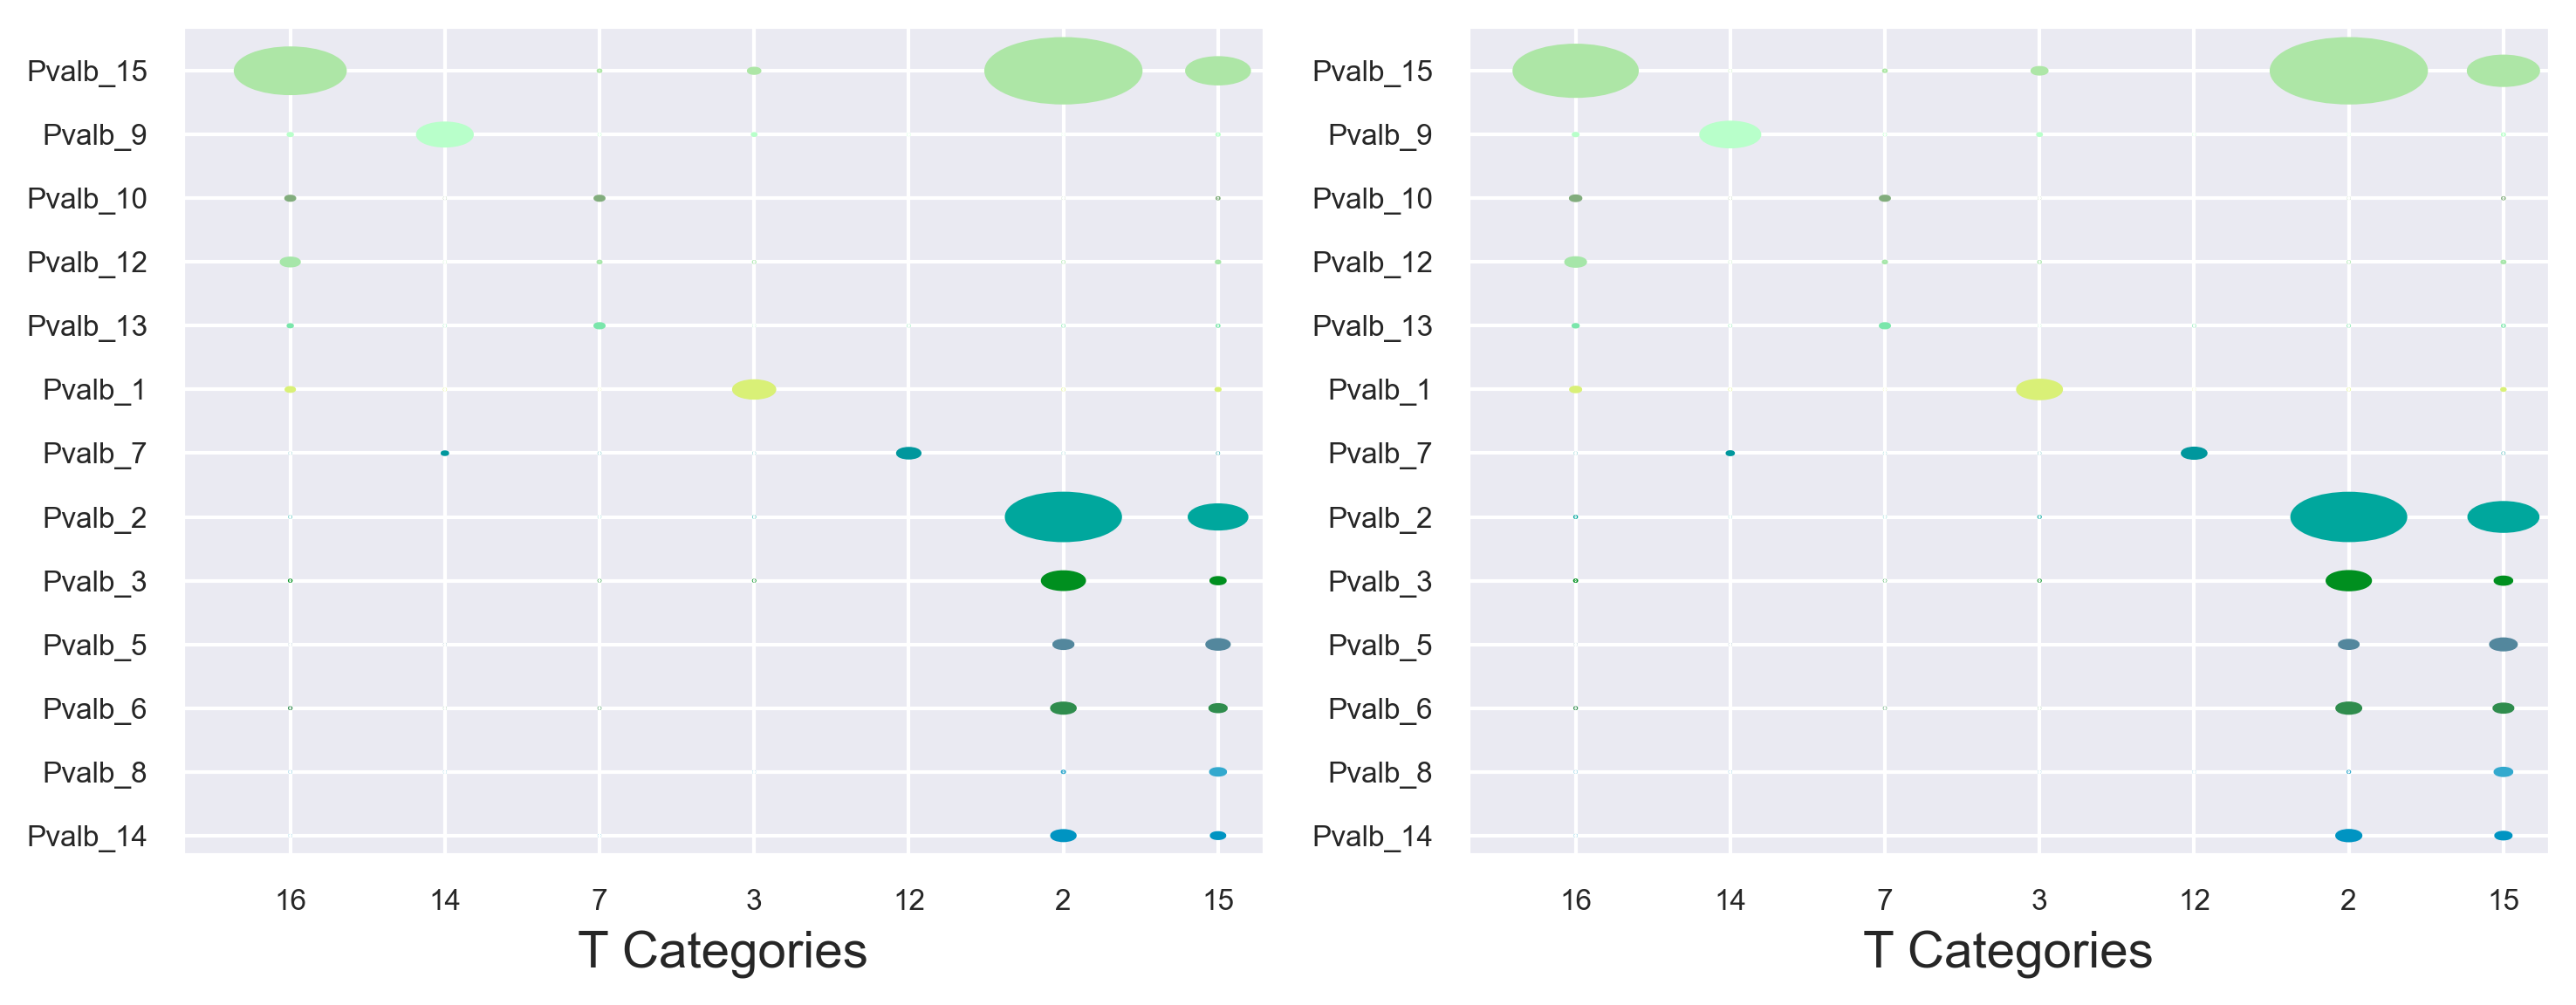

In [61]:
nprune_indx = outcome['nprune_indx']
cT_vs_cT = outcome['cT_vs_cT'][0]
confm = np.zeros((n_arm, len(T_class), model_order))
fig, axs = plt.subplots(1, n_arm, figsize=(10, 4), dpi=300)
for arm in range(n_arm): 
    categories = np.unique(outcome['pred_label'][-1][arm]).astype(int)
    perform_mat = cT_vs_cT[arm, class_reord, :]
    row_sum = perform_mat.sum(axis=1)
    confm[arm, :, :] = np.divide(perform_mat, row_sum[:, np.newaxis], 
                        out=np.zeros_like(perform_mat), 
                        where=row_sum[:, np.newaxis]!=0)
    row_ind, col_ind = linear_sum_assignment(1 - perform_mat)

    if model_order > len(T_class):
        not_used_cat = [a for a in range(model_order) if a not in list(col_ind)]
        cat_indx = np.concatenate((col_ind, np.array(not_used_cat)))
    else:
        cat_indx = col_ind
#     cat_indx = np.array([2, 9, 12, 8, 11, 5, 6, 10, 0, 7, 1, 3, 4])
    print(categories[cat_indx])

#     sort_idx = [np.argsort(perform_mat[it, :])[::-1] for it in range(len(T_class))]  
#     sort_idx = np.vstack(sort_idx).astype(int)
#     indexes = np.unique(sort_idx[:, 0], return_index=True)[1]
#     max_idx = [sort_idx[:,0][index] for index in sorted(indexes)]
#     max_c_ind = -1 * np.ones(model_order) #sort_idx[:,0]
#     rep_c = np.zeros(len(max_idx))
# #     if model_order > len(T_class):
#     not_used_cat = [a for a in range(model_order) if a not in max_idx]
#     match_ind = [np.where(nuc == col_ind)[0][0] for nuc in not_used_cat]
#     not_used_cat = np.array(not_used_cat)[np.argsort(match_ind)]
#     jump = 0
#     for cc in not_used_cat:
#         colm = np.argmax(perform_mat[:, cc].astype(int))
#         find_indx = np.where(sort_idx[colm, 0] == max_idx)[0][0]
#         rep_c[find_indx] += 1
#         if max_c_ind[find_indx+int(rep_c[find_indx])] > 0:
#             jump += 1
#         max_c_ind[find_indx+int(sum(rep_c))] = cc
#         print(cc, find_indx+int(rep_c[find_indx])+jump)
    
#     print(max_c_ind)
#     tmp_idx = np.where(max_c_ind==-1)[0]
#     max_c_ind[tmp_idx] = max_idx
#     cat_indx = max_c_ind.astype(int)
#     print(cat_indx)
    
#     else:
#         cat_indx = sort_idx[:, 0]
    
#     cat_indx = col_ind
    mtx = perform_mat[:, cat_indx] / np.max(perform_mat[:, cat_indx]) / 2
    for l in range(len(T_class)):
        for col in range(model_order):
            xy = np.array([col, l])
            axs[arm].add_patch(plt.Circle(xy, radius=(mtx[l, col]), color=color[l]))
    axs[arm].set_xlim([-.7, model_order-.7])
    axs[arm].set_ylim([-.7, len(T_class)-.7])
    axs[arm].invert_yaxis()
    axs[arm].set_yticks(np.arange(len(T_class)))
    axs[arm].set_xticks(np.arange(model_order))
    axs[arm].set_yticklabels(T_class[class_reord], fontsize=8)
    axs[arm].set_xticklabels(nprune_indx[cat_indx], fontsize=8) # categories[cat_indx], fontsize=8
    axs[arm].set_xlabel('T Categories', fontsize=14)
#     axs[0].set_ylabel('Supertypes', fontsize=14)

fig.tight_layout()

/Users/yeganeh.marghi/miniconda3/envs/tf14-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


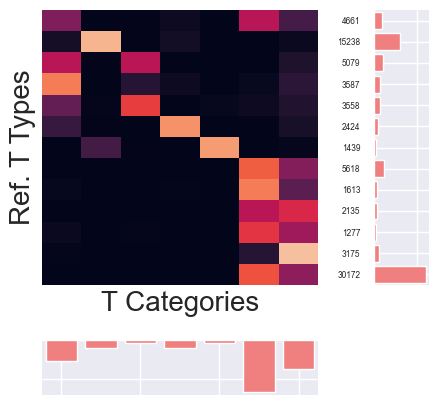

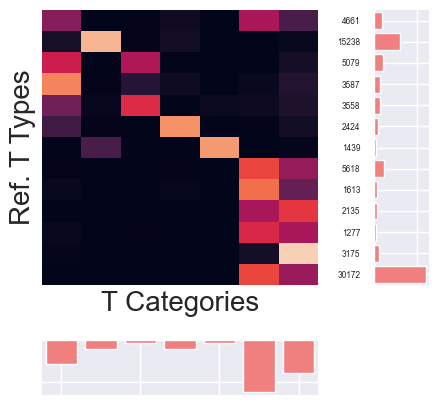

In [62]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    grid = plt.GridSpec(4, 4, hspace=1, wspace=1)
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=[], yticklabels=[], vmax=1, ax=ax_main, cbar=False)
    ax_main.set_ylabel('Ref. T Types', fontsize=20)
    ax_main.set_xlabel('T Categories', fontsize=20)
    ax_main.set_yticklabels(ax_main.get_yticklabels())

    # histogram on the right
    perform_mat = cT_vs_cT[arm, :, :]
    ax_bottom.bar(np.arange(model_order), np.sum(perform_mat[:, cat_indx], axis=0), color='lightcoral')
    # ax_bottom.set_ylim([0, 300])
    ax_bottom.invert_yaxis()
    ax_bottom.set_xlim([-.5, model_order-.5])
    ax_bottom.spines['top'].set_visible(False)
    ax_bottom.spines['right'].set_visible(False)
    ax_bottom.spines['bottom'].set_visible(False)
    ax_bottom.spines['left'].set_visible(False)

    # histogram in the bottom
    ax_right.barh(np.arange(len(T_class)), np.sum(perform_mat[:, cat_indx], axis=1).T, color='lightcoral')
    ax_right.set_ylim([-.5, len(T_class)-.5])
    # ax_right.set_xlim([0, 300])
    ax_right.set_yticks(np.arange(len(T_class)))
    ax_right.invert_yaxis()
    ax_right.set_yticklabels(np.sum(perform_mat[:, cat_indx], axis=1).astype(int), fontsize=6)
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)
    ax_right.spines['left'].set_visible(False)

    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_K_' + str(model_order) + '_arm_' + str(arm) + '.png', dpi=600)


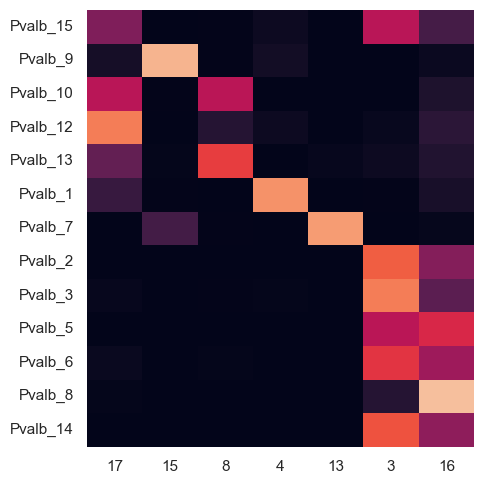

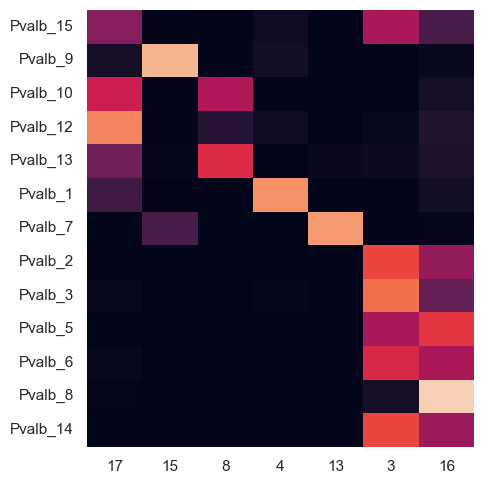

In [63]:
for arm in range(n_arm):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(np.squeeze(confm[arm, :, cat_indx].T), vmin=0, xticklabels=categories[cat_indx], 
                yticklabels=T_class[class_reord], vmax=1, ax=ax, cbar=False)

    fig.tight_layout()
    plt.savefig(saving_folder + '/confmax_' + subclass + '_arm_' + str(arm) + '.png', dpi=600)

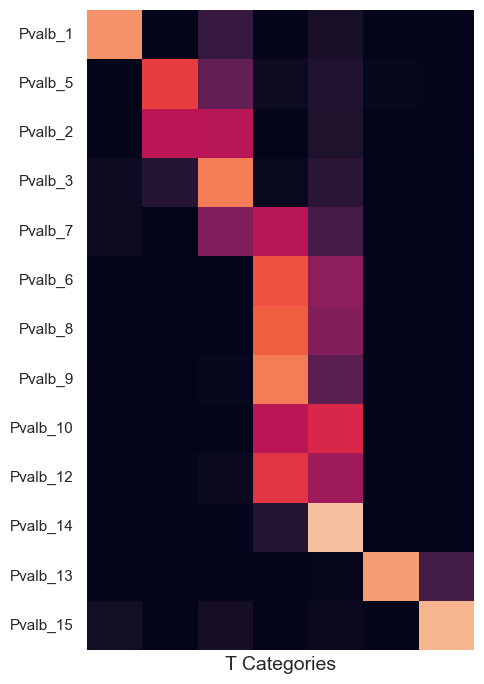

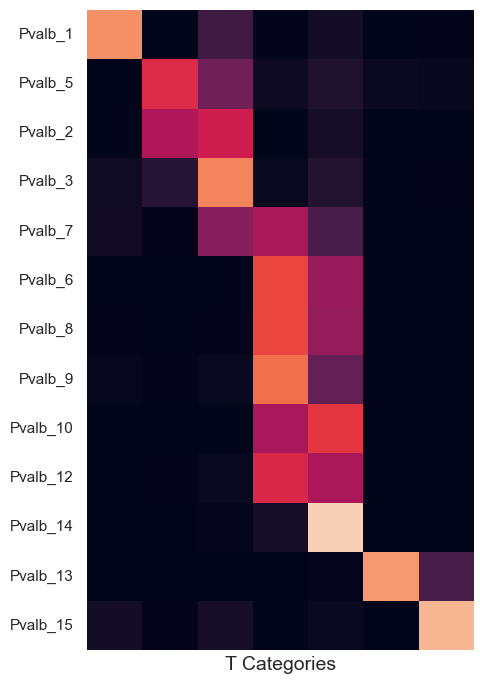

In [92]:
from sklearn.metrics import confusion_matrix

true_label = np.argmax(data['c_p'], axis=1)

class_reord = np.array([1,4,2,3,6,5,7,8,9,10,12,11,13,])
class_reord = (class_reord - 1).astype(int)

for arm in range(n_arm):
    categories = np.argmax(outcome['q_c'][-1][arm,:,:], axis=1)
    uniq_categories = np.unique(categories)
    prediction = np.zeros(len(categories))

    for ic, c in enumerate(uniq_categories):
        tmp_idx = np.where(categories == c)[0]
        prediction[tmp_idx] = ic

    conf_mat_sk = confusion_matrix(true_label , prediction, normalize='true')
    conf_mat_sk = conf_mat_sk[:, :model_order]
    conf_mat_sk = conf_mat_sk[class_reord,:]
    conf_row_ind, conf_col_ind = linear_sum_assignment(1 - conf_mat_sk)
   
    fig = plt.figure(figsize=(5, 7), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(conf_mat_sk[:, conf_col_ind], xticklabels=[],
                yticklabels=T_class[class_reord], vmin=0, vmax=1, ax=ax, cbar=False)
    
    ax.set_xlabel('T Categories', fontsize=14)
    fig.tight_layout()
    plt.savefig(saving_folder + f'/mi_{subclass}_K_{model_order}_arm_{arm}.png', dpi=600)


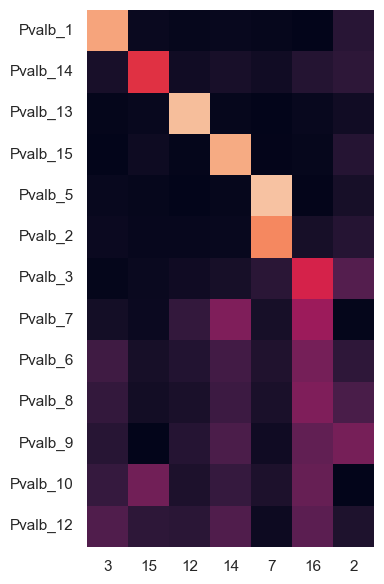

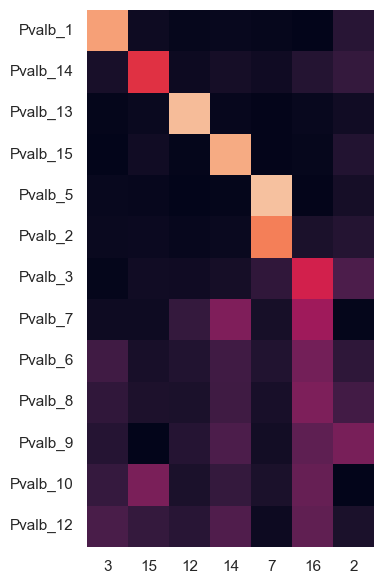

In [95]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score, mutual_info_score
from sklearn.preprocessing import normalize

class_reord = np.array([1,12,11,4,2,3,6,13,5,7,8,9,10])
class_reord = (class_reord - 1).astype(int)

true_label = data['c_onehot'].astype(int)
mi_ind = []
n_cluster = len(T_class)

for arm in range(n_arm):
    categories = np.argmax(outcome['q_c'][-1][arm,:,:], axis=1)
    uniq_categories = np.unique(categories)
    prediction = np.zeros(len(categories))
    mi_mat = np.zeros((n_cluster, model_order))

    for ic, c in enumerate(uniq_categories):
        tmp_idx = np.where(categories == c)[0]
        prediction[tmp_idx] = ic
    
    for c in range(model_order):
        per_c_label = np.zeros(len(true_label))
        per_c_label[prediction == c] = 1
        for f in range(n_cluster):
            mi_mat[f, c] = adjusted_mutual_info_score(true_label[:, f], per_c_label)

    mi_mat_norm = normalize(mi_mat, axis=1, norm='l1')
    mi_mat_norm = mi_mat_norm[class_reord, :]
    mi_row_ind, mi_col_ind = linear_sum_assignment(1 - mi_mat_norm)
    mi_ind.append(mi_col_ind)
    
    fig = plt.figure(figsize=(4, 6), dpi=100)
    ax = fig.add_subplot()
    sns.set(font_scale=1.)
    sns.heatmap(mi_mat_norm[:, mi_col_ind], xticklabels=nprune_indx[mi_col_ind],
                yticklabels=T_class[class_reord], vmin=0, vmax=1, ax=ax, cbar=False)

    fig.tight_layout()
    plt.savefig(saving_folder + f'/mi_{subclass}_K_{model_order}_arm_{arm}.png', dpi=600)
    

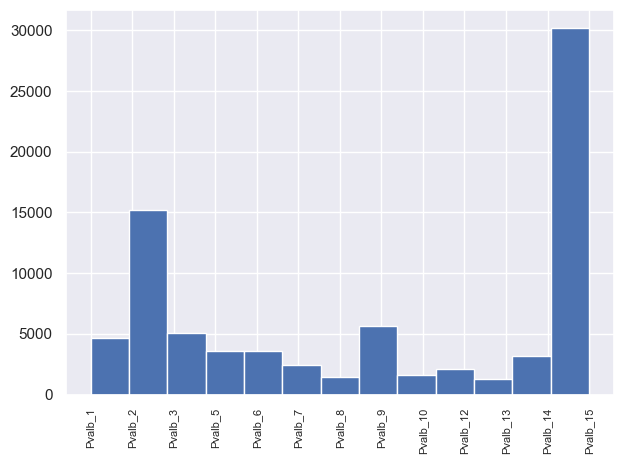

[4661, 15238, 5079, 3587, 3558, 2424, 1439, 5618, 1613, 2135, 1277, 3175, 30172] 79976


In [23]:
plt.figure()
plt.hist(data['label'], bins=len(T_class))
    
plt.xticks(uniq_labels, T_class, fontsize=8, rotation=90)
plt.tight_layout()
plt.savefig(saving_folder + '/subclass_posterior.png', dpi=600)
plt.show()
print(num_Tclass, sum(num_Tclass))

In [23]:
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
ps_time_path = path + '/MTG_AD_data/all_donors_data/pseudotime.npy'
ps_time = np.load(ps_time_path)
data['ps_time'] = np.zeros(len(data['label']))
for idonor, donor in enumerate(np.unique(data['external_donor_name'])):
    idx0 = np.where(data['external_donor_name'] == donor)[0]
    n_donor = int(donor[donor.find(' ')+1:])
    idx1 = np.where(ps_time[0, :].astype(int) == n_donor)[0]
    data['ps_time'][idx0] = ps_time[1, idx1][0]

data['ps_time']

array([0.07148746, 0.07148746, 0.07148746, ..., 0.85038367, 0.85038367,
       0.85038367])

2.0
2.0 Sst_10
using CPU ...
Total loss: 0.05054460559040308
Total loss: 0.05155777372419834
Total loss: 0.03630357654765248
Total loss: 0.08147813100367785
Total loss: 0.0379418486263603
Total loss: 0.03716796566732228
Total loss: 0.04011548962444067
Total loss: 0.07909246627241373
Total loss: 0.07807746529579163
Total loss: 0.07615931332111359


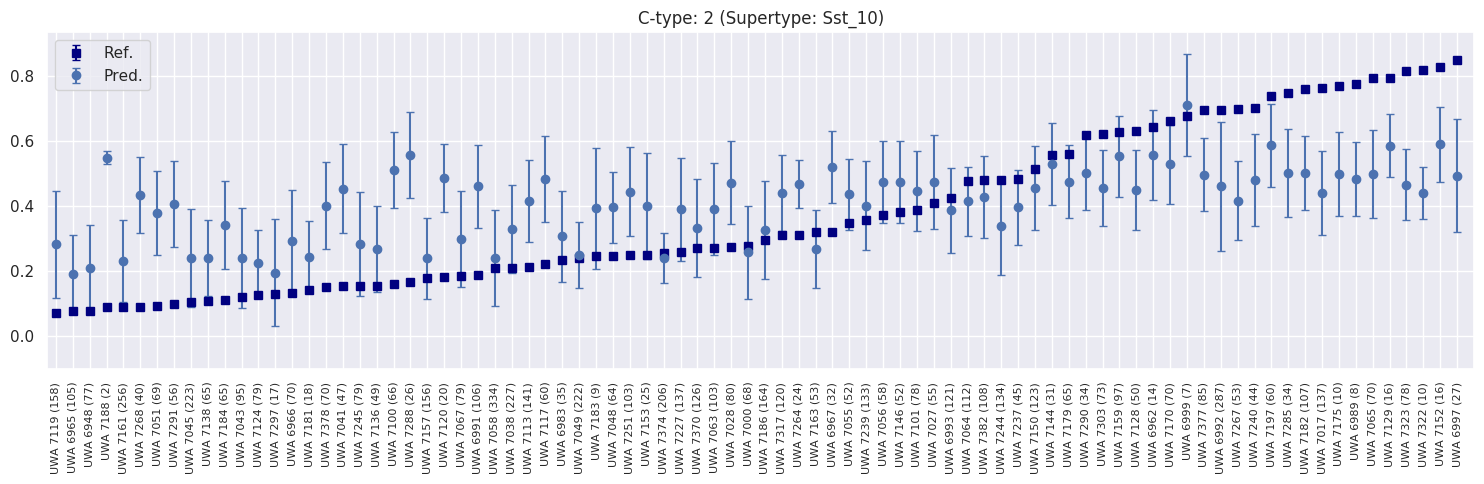

Pearsons correlation: 0.643
5.0


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5.0 Sst_1
using CPU ...
Total loss: 0.03501284867525101
Total loss: 0.03669833019375801
Total loss: 0.04139872919768095
Total loss: 0.03644433803856373
Total loss: 0.03602507058531046
Total loss: 0.0330673661082983
Total loss: 0.03784758783876896
Total loss: 0.040284136310219765
Total loss: 0.044517068192362785
Total loss: 0.032550469040870667


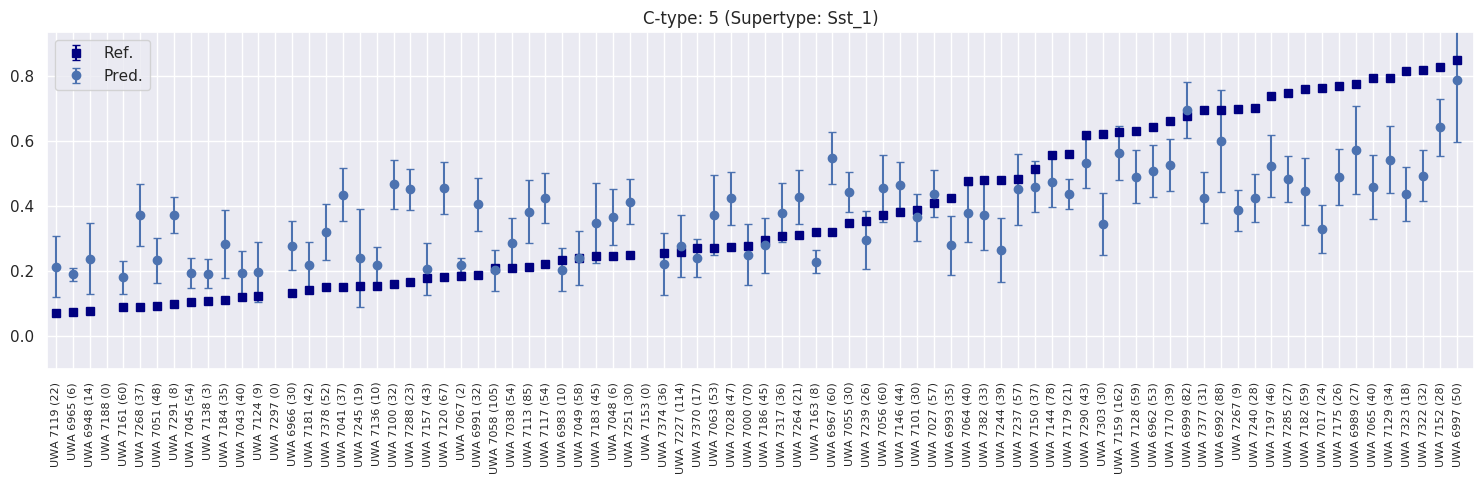

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.719
6.0
6.0 Sst_19
using CPU ...
Total loss: 0.04268442839384079
Total loss: 0.046387388836592436
Total loss: 0.04533322807401419
Total loss: 0.04037562292069197
Total loss: 0.040589227341115475
Total loss: 0.04973581666126847
Total loss: 0.03851224994286895
Total loss: 0.04383180243894458
Total loss: 0.04127579787746072
Total loss: 0.04457600740715861


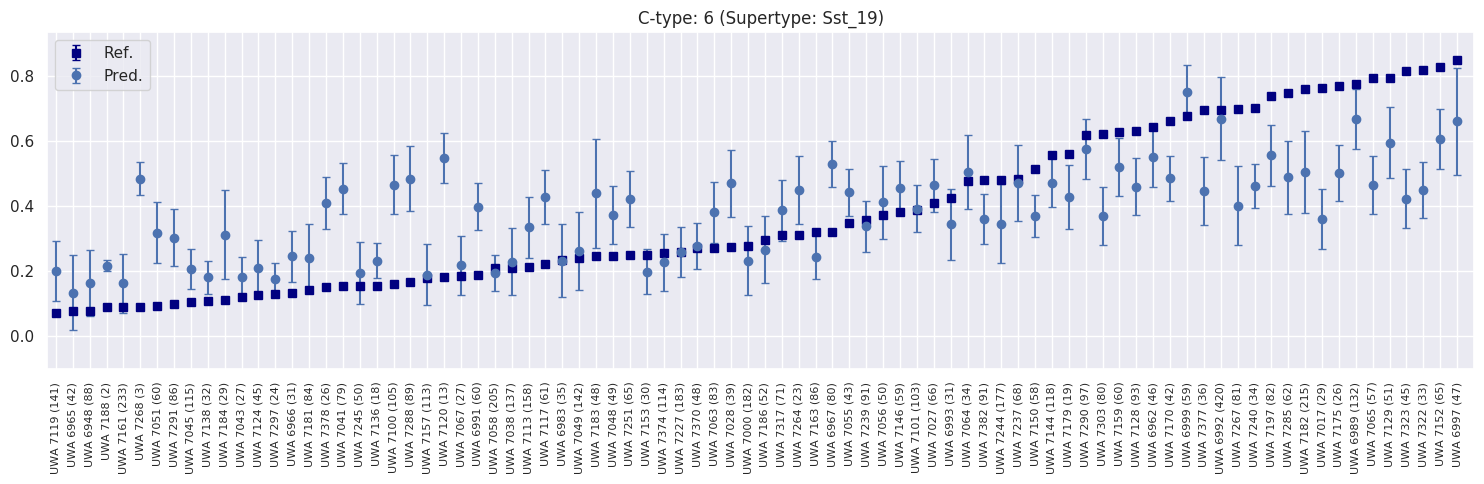

Pearsons correlation: 0.708
8.0
8.0 Sst_3
using CPU ...
Total loss: 0.03996380232274532
Total loss: 0.034326935186982155
Total loss: 0.03528030589222908
Total loss: 0.03436679020524025
Total loss: 0.038095498457551
Total loss: 0.03765443339943886
Total loss: 0.03876507095992565
Total loss: 0.04313302971422672
Total loss: 0.03607459180057049
Total loss: 0.03568300325423479


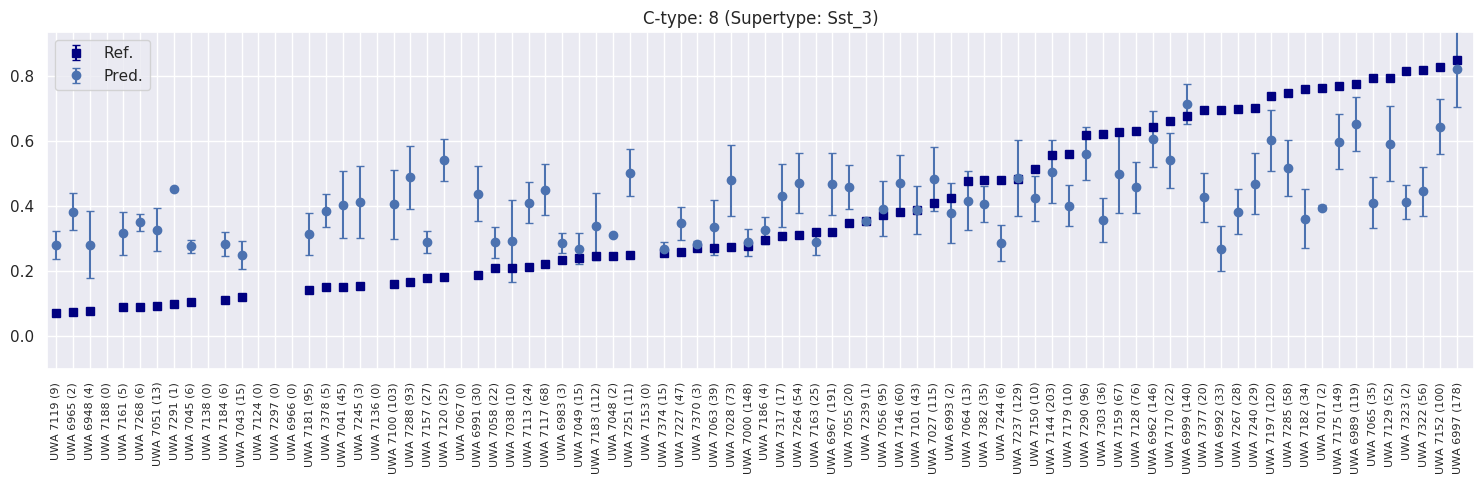

Pearsons correlation: 0.589
9.0
9.0 Sst_5
using CPU ...
Total loss: 0.04895174037665129
Total loss: 0.03883238090202212
Total loss: 0.0380203383974731
Total loss: 0.04611588269472122
Total loss: 0.04482498066499829
Total loss: 0.04123271116986871
Total loss: 0.03779973089694977
Total loss: 0.037762611638754606
Total loss: 0.044183505000546575
Total loss: 0.043829652946442366


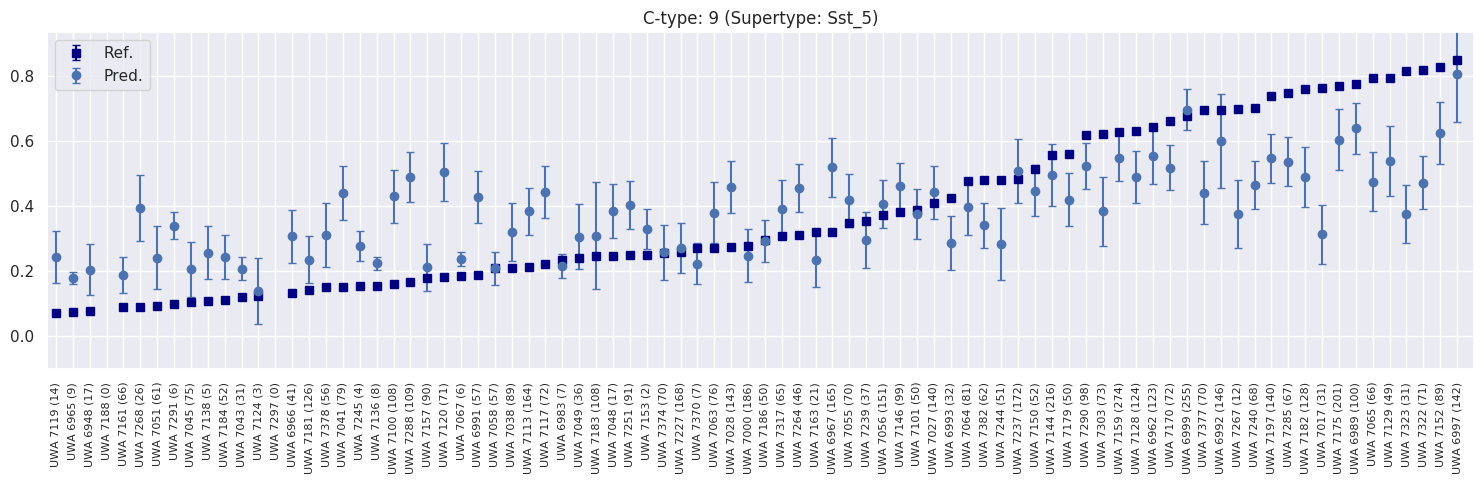

Pearsons correlation: 0.720
10.0
10.0 Sst_19
using CPU ...
Total loss: 0.034382342671354614
Total loss: 0.03322607775529226
Total loss: 0.034353915601968765
Total loss: 0.0372137992332379
Total loss: 0.03451924522717794
Total loss: 0.03396749310195446
Total loss: 0.03492652252316475
Total loss: 0.03449058346450329
Total loss: 0.034221199030677475
Total loss: 0.0372498823950688


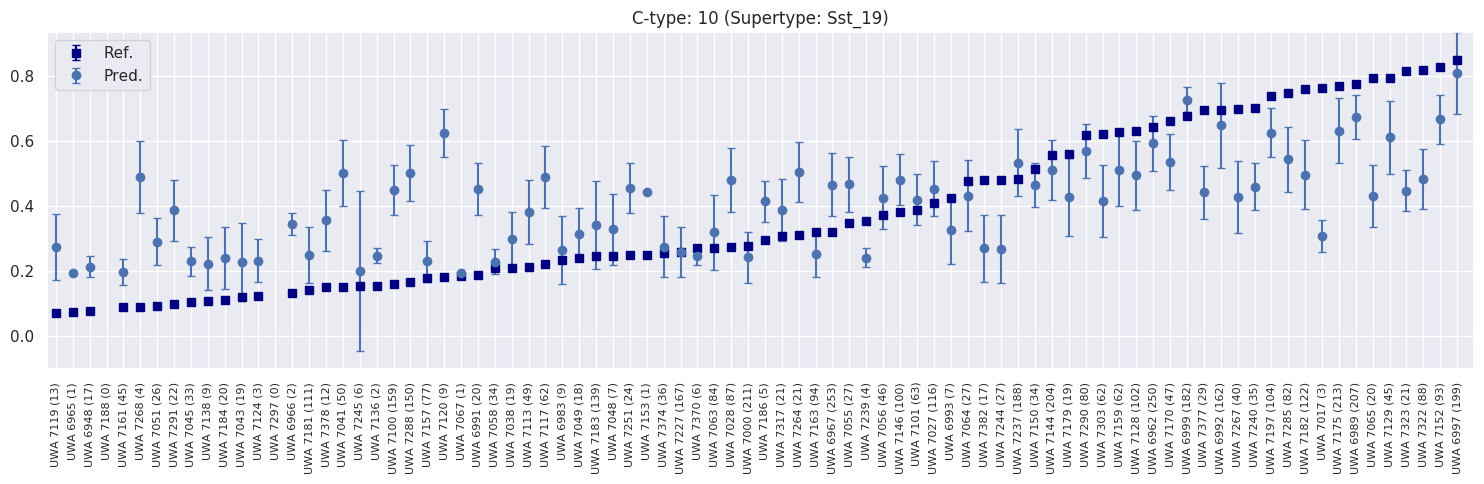

Pearsons correlation: 0.673
15.0
15.0 Sst_23
using CPU ...
Total loss: 0.029730299798150856
Total loss: 0.024298503684500854
Total loss: 0.03067503807445367
Total loss: 0.027665748881796997
Total loss: 0.0233106908077995
Total loss: 0.027892525928715866
Total loss: 0.02350207045674324
Total loss: 0.024522200226783752
Total loss: 0.023114992848907907
Total loss: 0.02887524664402008


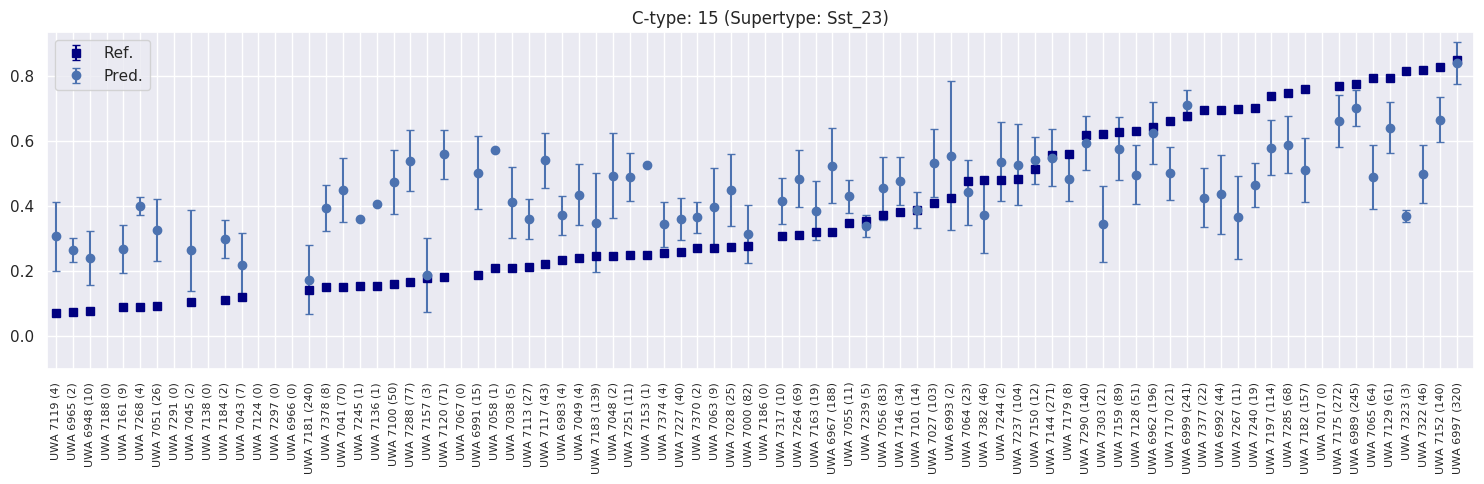

Pearsons correlation: 0.631
18.0
18.0 Sst_20
using CPU ...
Total loss: 0.057410831252733864
Total loss: 0.05724395935734113
Total loss: 0.050101434191068016
Total loss: 0.05593583174049854
Total loss: 0.05217806622385979
Total loss: 0.04912178094188372
Total loss: 0.049442953119675316
Total loss: 0.05611179769039154
Total loss: 0.060130998492240906
Total loss: 0.05320786188046137


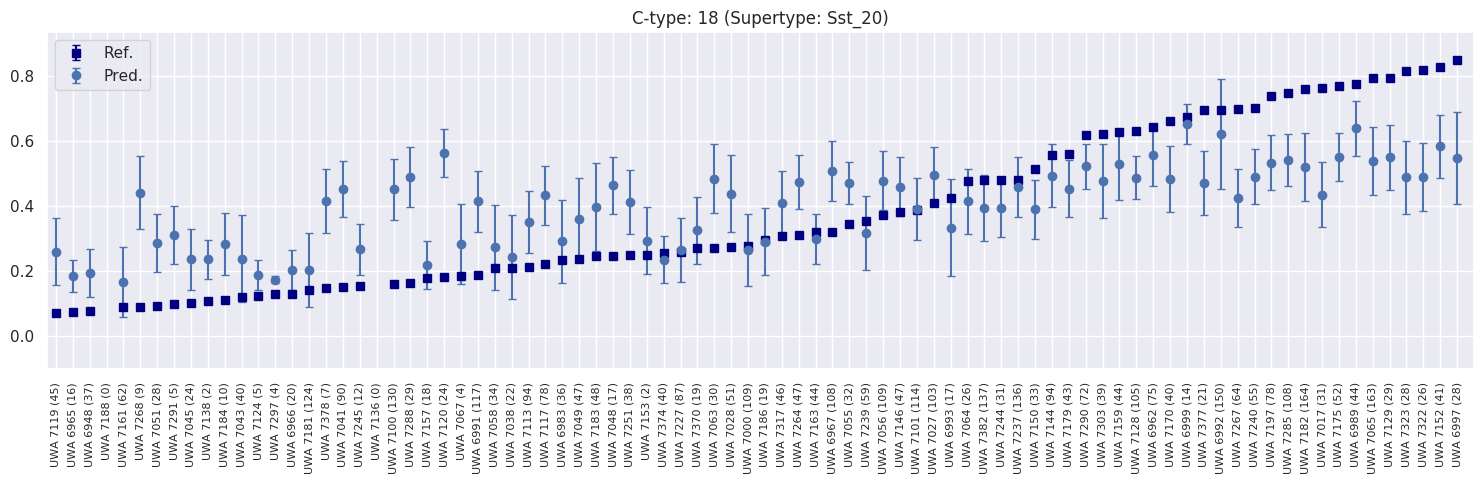

Pearsons correlation: 0.750
20.0
20.0 Sst_11
using CPU ...
Total loss: 0.040570138643185295
Total loss: 0.04165079010029634
Total loss: 0.040425474445025124
Total loss: 0.03922645313044389
Total loss: 0.04433000646531582
Total loss: 0.03942715252439181
Total loss: 0.039535914858182274
Total loss: 0.036653364077210426
Total loss: 0.04656475968658924
Total loss: 0.042589702333013214


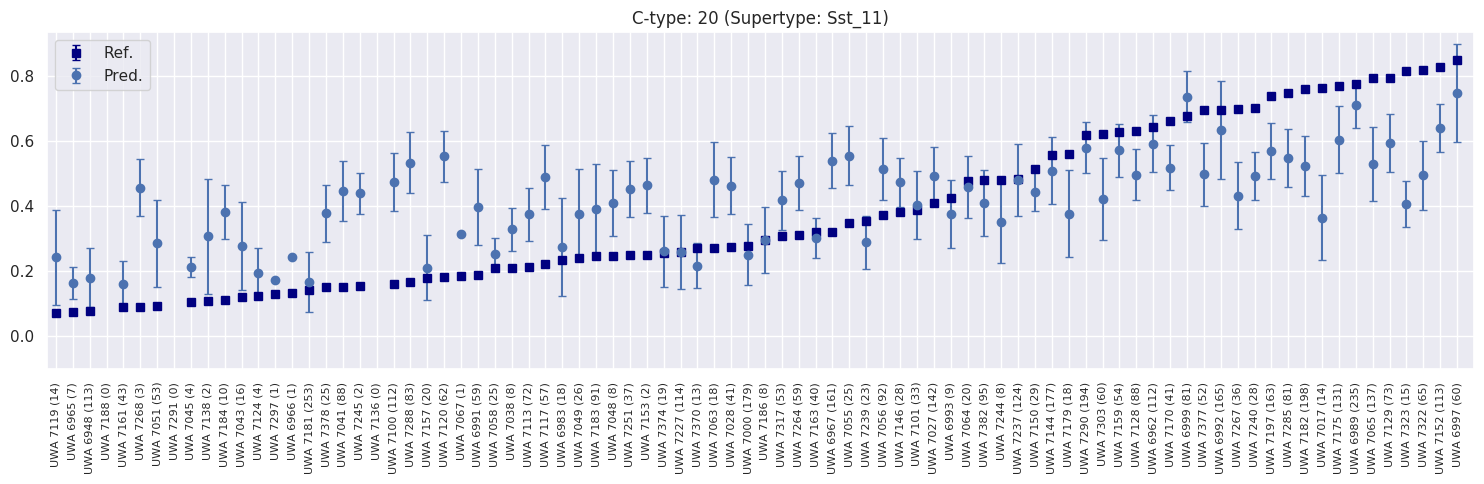

Pearsons correlation: 0.696


In [24]:
from utils.state_analysis import state_analyzer
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import pandas as pd

path = os.getcwd()
n_run = 1
folder_name = f'{subclass}_run_{n_run}_K_{n_categories}_Sdim_{state_dim}_ngene_{n_gene}_fcDim_{fc_dim}_latDim_{latent_dim}_lr_{lr}_pDrop_{p_drop}_n_arm_{n_arm}_tau_{tau}_bsize_{batch_size}_nepoch_{n_epoch}_nepochP_{n_epoch_p}'
saving_folder = path + "/results/cpl_mixVAE/"
saving_folder = saving_folder + str(folder_name)

arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'ps_time'
    
uniq_score = np.unique(data[metadata])
uniq_donor = np.array([data['external_donor_name'][data[metadata]==u_m][0] for u_m in uniq_score])

df_ps_time = pd.DataFrame()
df_ps_time['c'] = np.zeros(len(cat))
df_ps_time['supertype'] = np.zeros(len(cat))
df_ps_time['pearson_corr'] = np.zeros(len(cat))
df_ps_time['mse'] = np.zeros(len(cat))

overall_cell_ps = []
        
for i_c, c in enumerate(cat):
    print(c)
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            trained_model
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []
        num_cells = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            num_cells.append(len(d_idx))
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.errorbar(x, meta_true_mean,  yerr = meta_true_std, linestyle='None',  marker='s', mfc='Navy',
        mec='Navy',  capsize=3,  ecolor='Navy', label='Ref.')
        # plt.plot(x, y0, '--', color='black')
        plt.errorbar(x, meta_pred_mean,  yerr = meta_pred_std, linestyle='None',  fmt='ob',  capsize=3,  ecolor='b', label='Pred.')
        # plt.plot(x, y1, '-', color='blue')
        plt.xticks(x, xtick, rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/ps_time_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_mean[meta_pred_mean > 0]
        y_true = meta_true_mean[meta_pred_mean > 0]
        df_ps_time['c'][i_c] = int(c)
        df_ps_time['supertype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_ps_time['pearson_corr'][i_c] = corr
        df_ps_time['mse'][i_c] = np.mean((y_pred - y_true)**2)
        overall_cell_ps.append(np.array(num_cells))

In [25]:
df_ps_time

c supertype  pearson_corr       mse
0   2.0    Sst_10      0.642975  0.038144
1   5.0     Sst_1      0.718571  0.031128
2   6.0    Sst_19      0.707838  0.030992
3   8.0     Sst_3      0.589110  0.040009
4   9.0     Sst_5      0.719624  0.030433
5  10.0    Sst_19      0.673004  0.033454
6  15.0    Sst_23      0.631215  0.038918
7  18.0    Sst_20      0.749680  0.029952
8  20.0    Sst_11      0.695725  0.032442

In [39]:
np.unique(data['ps_time'])

array([0.07148746, 0.07593546, 0.07764612, 0.08892324, 0.08898071,
       0.08988779, 0.09315747, 0.10008848, 0.10392603, 0.10878458,
       0.11043725, 0.12103243, 0.12506202, 0.13047882, 0.13161733,
       0.14317883, 0.14993509, 0.15278984, 0.15520204, 0.15569487,
       0.16190425, 0.16537331, 0.17820666, 0.18195919, 0.18506636,
       0.18913506, 0.20965295, 0.20997377, 0.21348472, 0.22214136,
       0.2342964 , 0.23921912, 0.24581481, 0.24611217, 0.25040112,
       0.25112352, 0.25548211, 0.26007601, 0.27066803, 0.27183928,
       0.2749943 , 0.27663604, 0.2950035 , 0.30995909, 0.31281293,
       0.31978396, 0.32172296, 0.34705682, 0.35605386, 0.3740492 ,
       0.38346891, 0.3871683 , 0.41111813, 0.42426537, 0.47711117,
       0.47965335, 0.48199526, 0.48252371, 0.51370344, 0.55787211,
       0.56117307, 0.61958878, 0.62302977, 0.6285328 , 0.63166984,
       0.64436812, 0.6638267 , 0.67636105, 0.69624858, 0.69768722,
       0.69982285, 0.70344497, 0.73835524, 0.7475574 , 0.76196

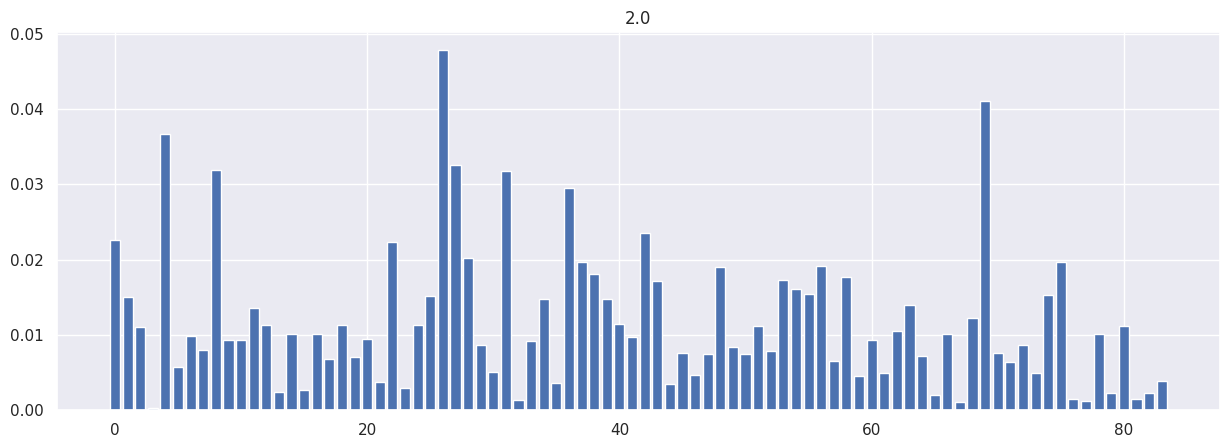

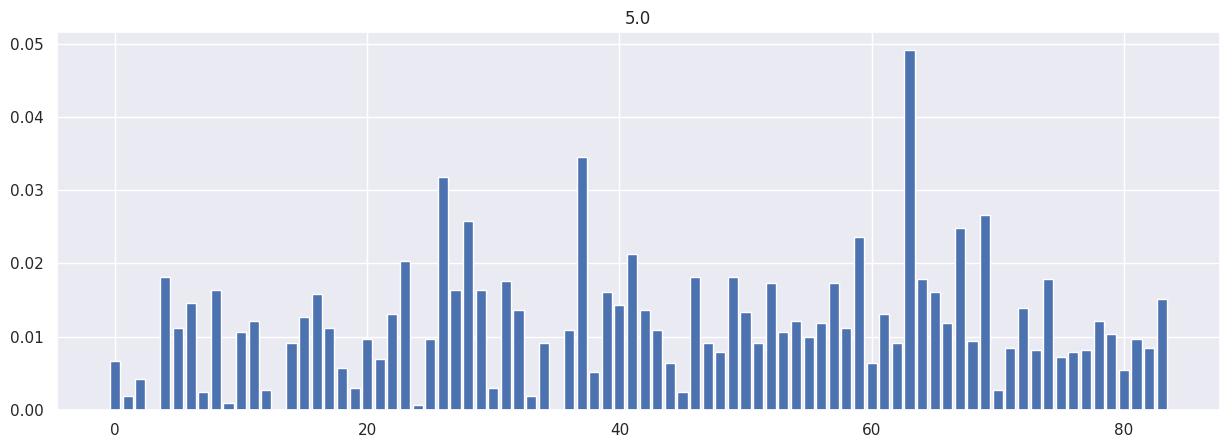

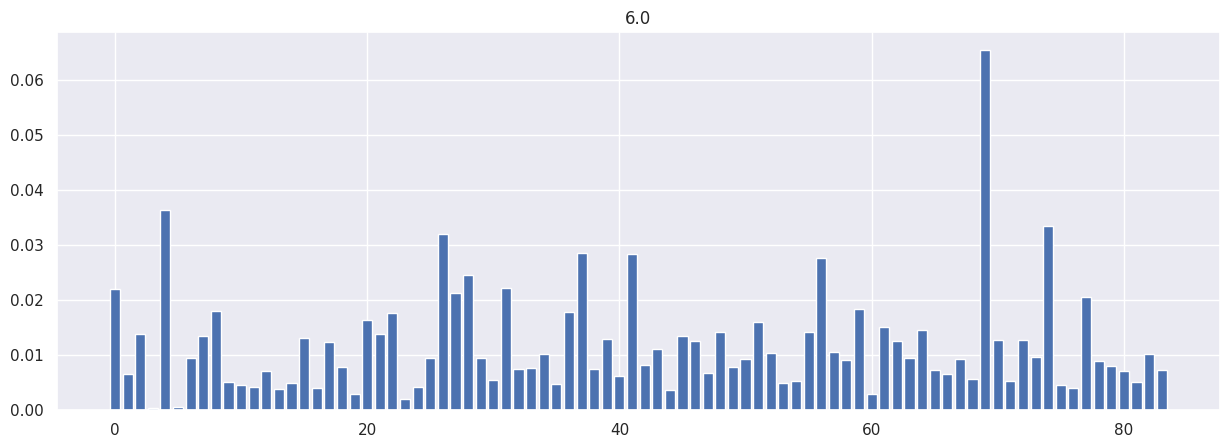

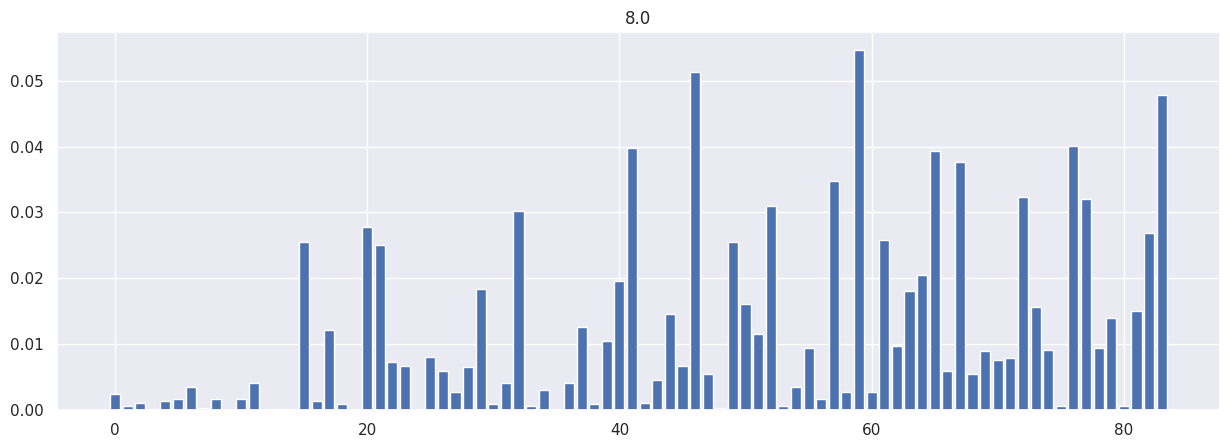

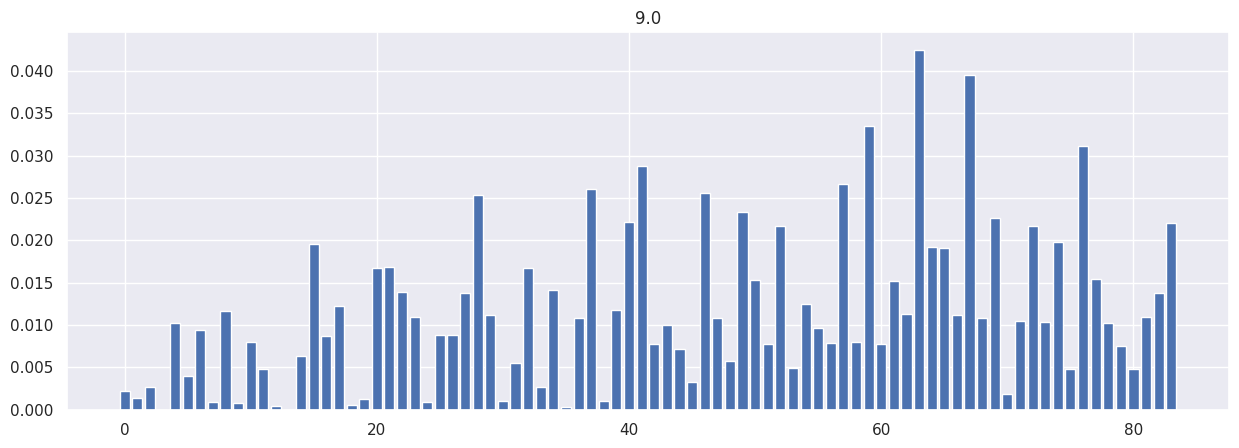

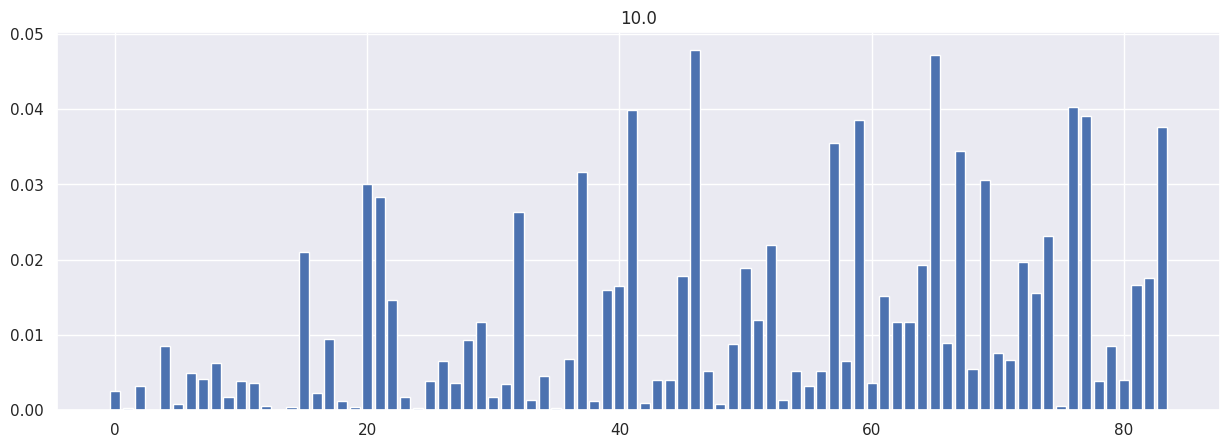

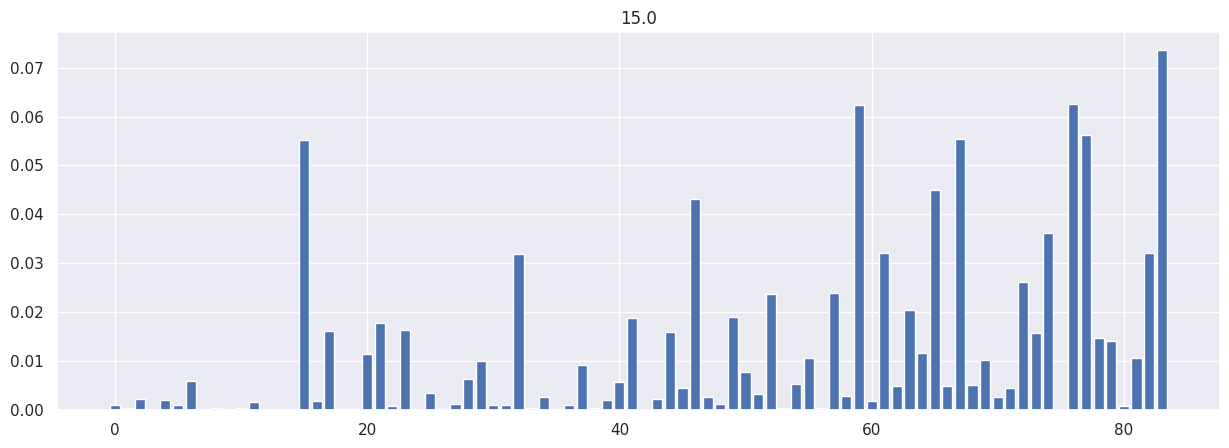

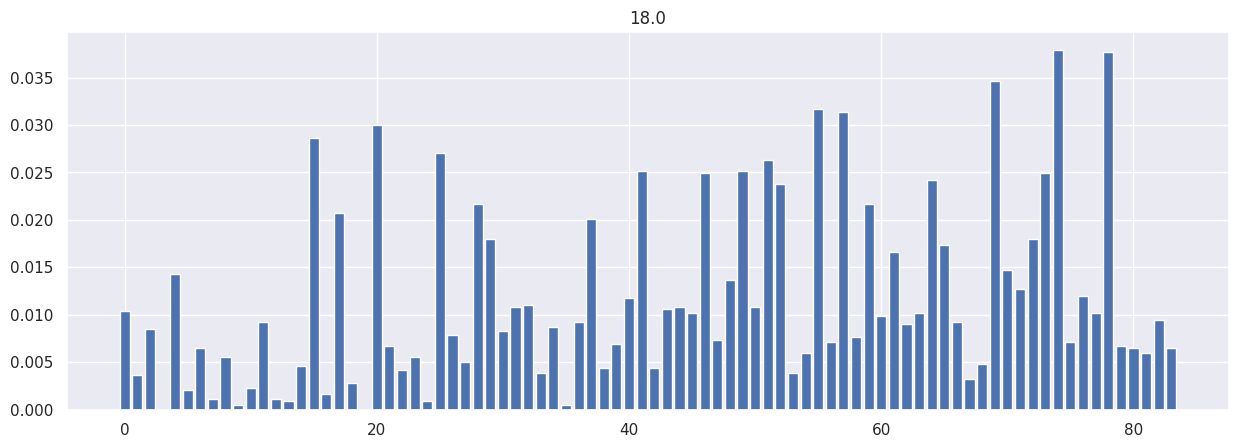

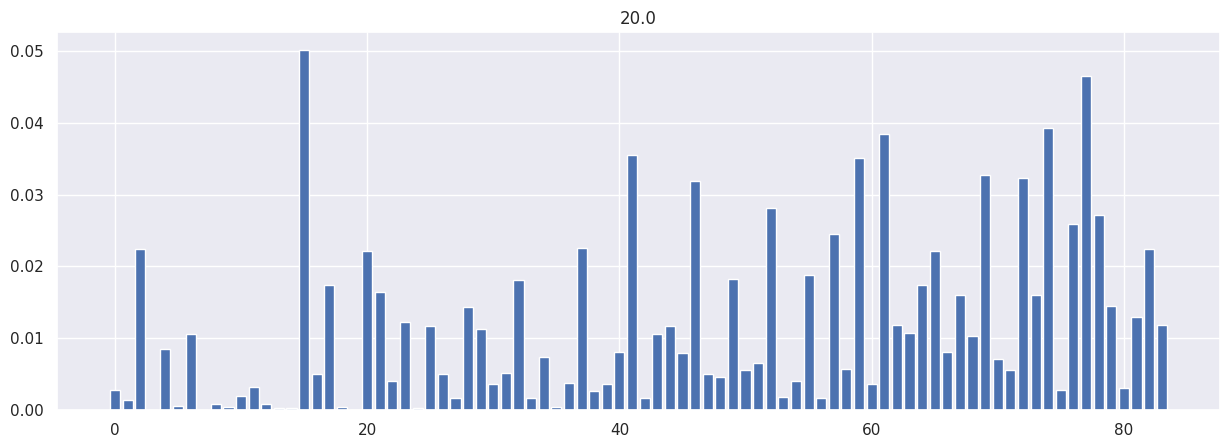

In [42]:
for i_cc, cc in enumerate(cat):
    plt.figure(figsize=[15, 5],dpi=100)
    plt.bar(np.arange(len(overall_cell_ps[i_cc])), overall_cell_ps[i_cc]/sum(overall_cell_ps[i_cc]))
    plt.title(cc)
    plt.show()

2.0 Sst_10
using CPU ...
Total loss: 0.09358008857816458
Total loss: 0.06161651760339737
Total loss: 0.08252130728214979
Total loss: 0.09139849431812763
Total loss: 0.054620989598333836
Total loss: 0.05411646142601967
Total loss: 0.06477719079703093
Total loss: 0.05403391318395734
Total loss: 0.07270605303347111
Total loss: 0.061954217962920666


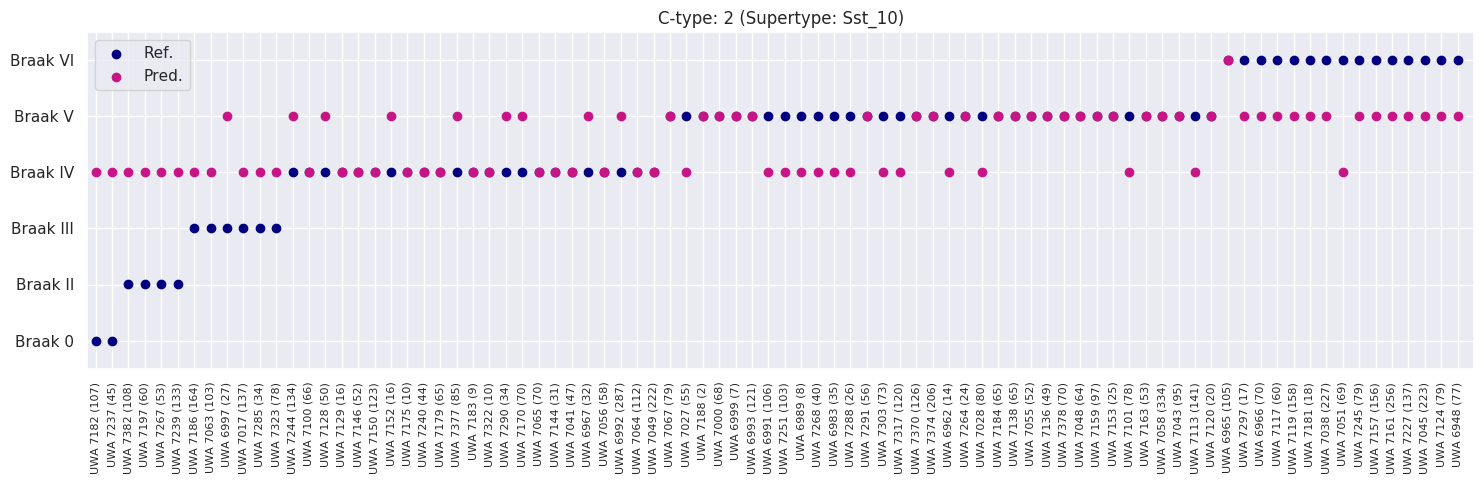

Pearsons correlation: 0.524


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5.0 Sst_1
using CPU ...
Total loss: 0.05905403196811676
Total loss: 0.05059339478611946
Total loss: 0.055395014584064484
Total loss: 0.05557272955775261
Total loss: 0.05192319490015507
Total loss: 0.042661214247345924
Total loss: 0.05125892162322998
Total loss: 0.04332655481994152
Total loss: 0.049211811274290085
Total loss: 0.06349711492657661


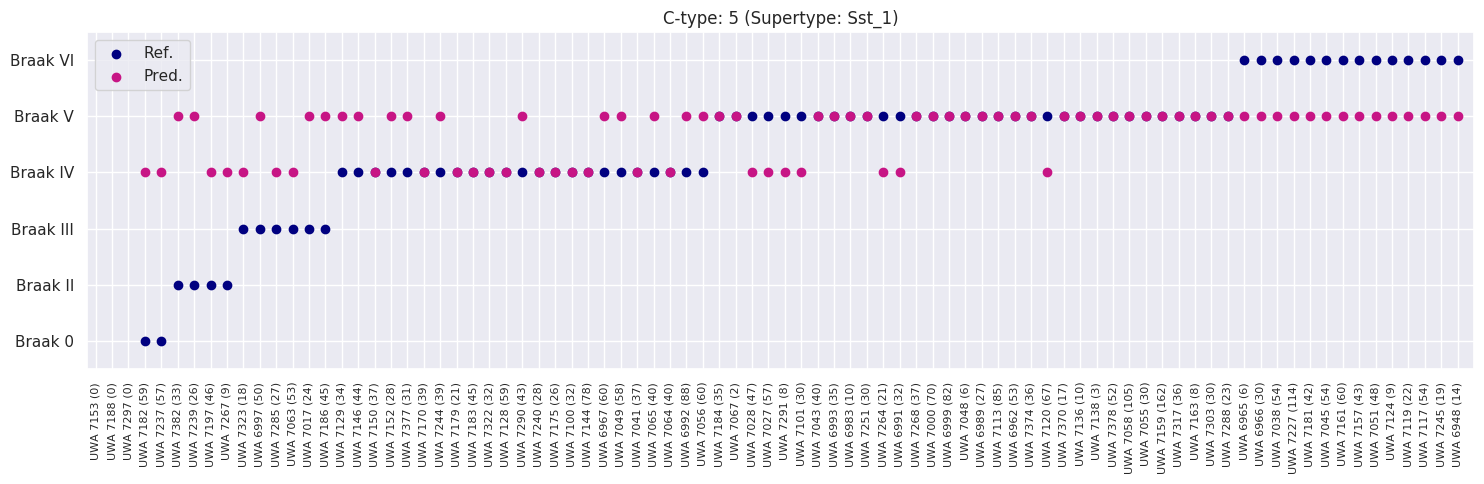

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.431
6.0 Sst_19
using CPU ...
Total loss: 0.04087050538510084
Total loss: 0.04009298048913479
Total loss: 0.040086532942950726
Total loss: 0.04917511297389865
Total loss: 0.04790803277865052
Total loss: 0.04120168602094054
Total loss: 0.04856476094573736
Total loss: 0.0421496843919158
Total loss: 0.040117114782333374
Total loss: 0.042219182942062616


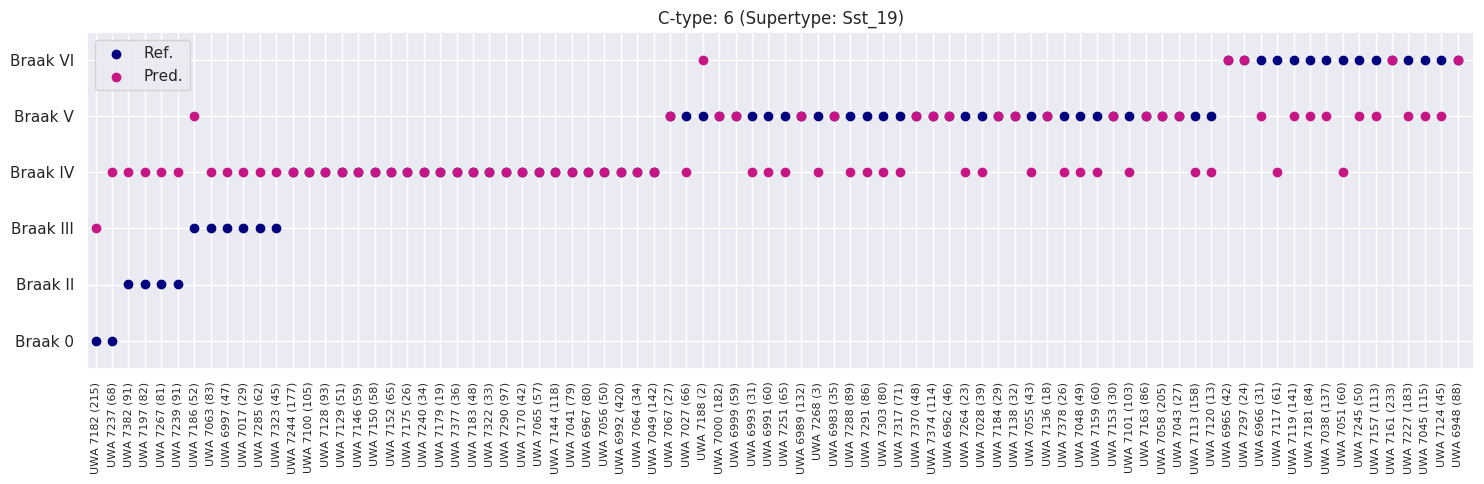

Pearsons correlation: 0.588
8.0 Sst_3
using CPU ...
Total loss: 0.03496060241013765
Total loss: 0.03485666587948799
Total loss: 0.026603931561112404
Total loss: 0.03252728655934334
Total loss: 0.03478284366428852
Total loss: 0.036214498803019524
Total loss: 0.037434364669024944
Total loss: 0.03485673386603594
Total loss: 0.03158991690725088
Total loss: 0.03396591730415821


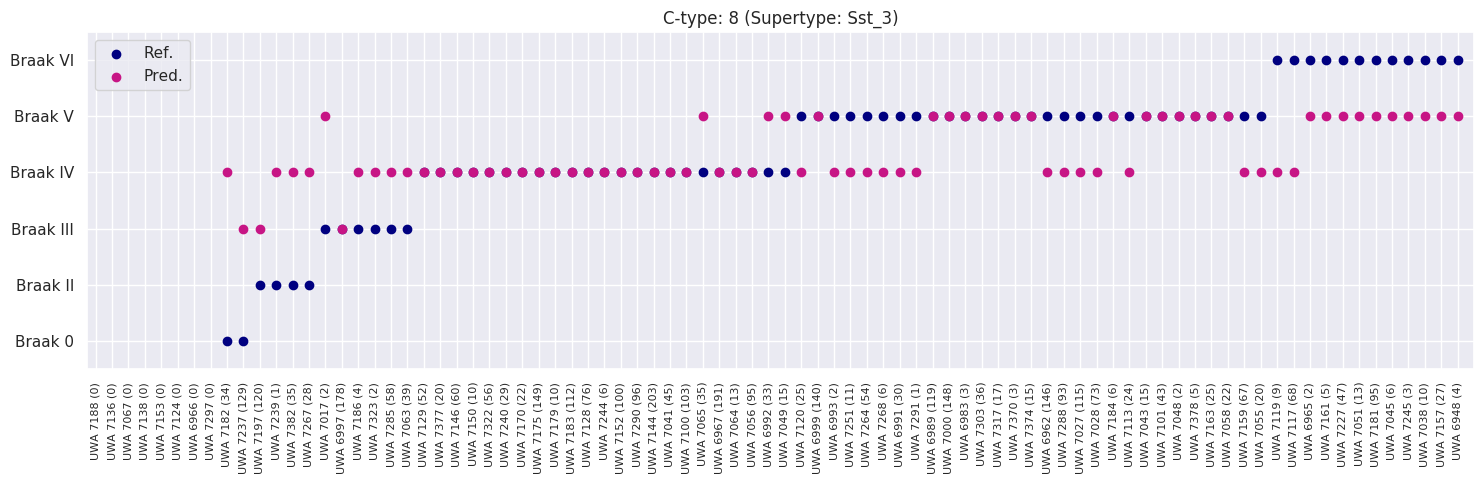

Pearsons correlation: 0.589
9.0 Sst_5
using CPU ...
Total loss: 0.058005742728710175
Total loss: 0.05180995212867856
Total loss: 0.05793028511106968
Total loss: 0.05976962298154831
Total loss: 0.04444603715091944
Total loss: 0.04846010822802782
Total loss: 0.0478588230907917
Total loss: 0.0600390424951911
Total loss: 0.05081722978502512
Total loss: 0.04187180381268263


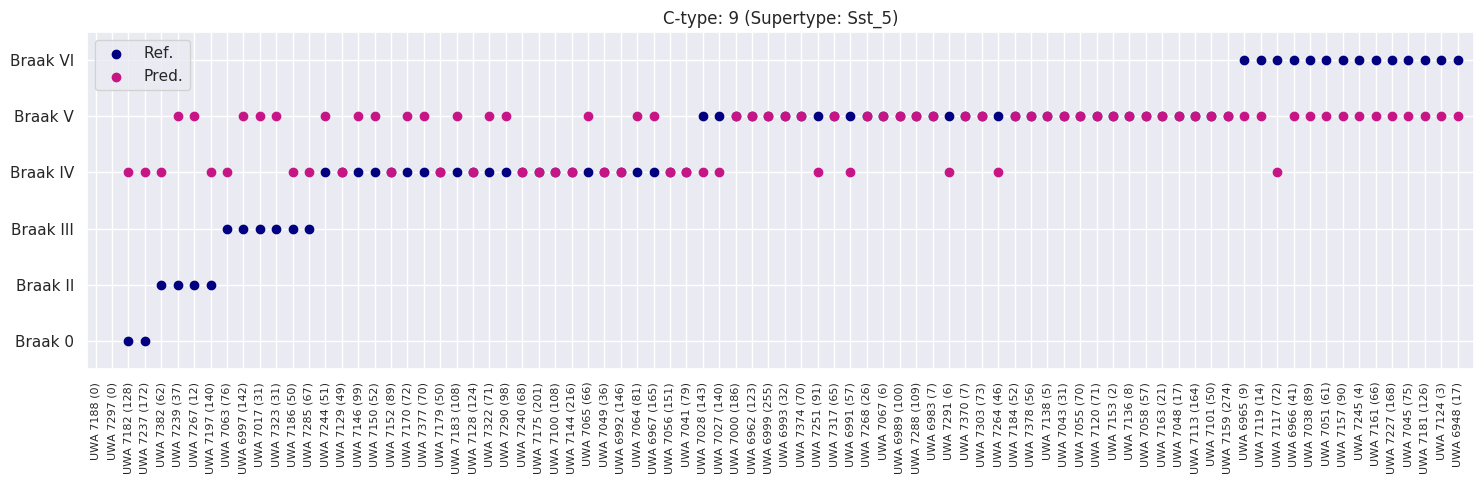

Pearsons correlation: 0.410
10.0 Sst_19
using CPU ...
Total loss: 0.0414488452176253
Total loss: 0.030682773018876713
Total loss: 0.040123434116443
Total loss: 0.03371902368962765
Total loss: 0.036475672076145806
Total loss: 0.040177573139468827
Total loss: 0.04054054679969946
Total loss: 0.03742551617324352
Total loss: 0.03598186932504177
Total loss: 0.03399128342668215


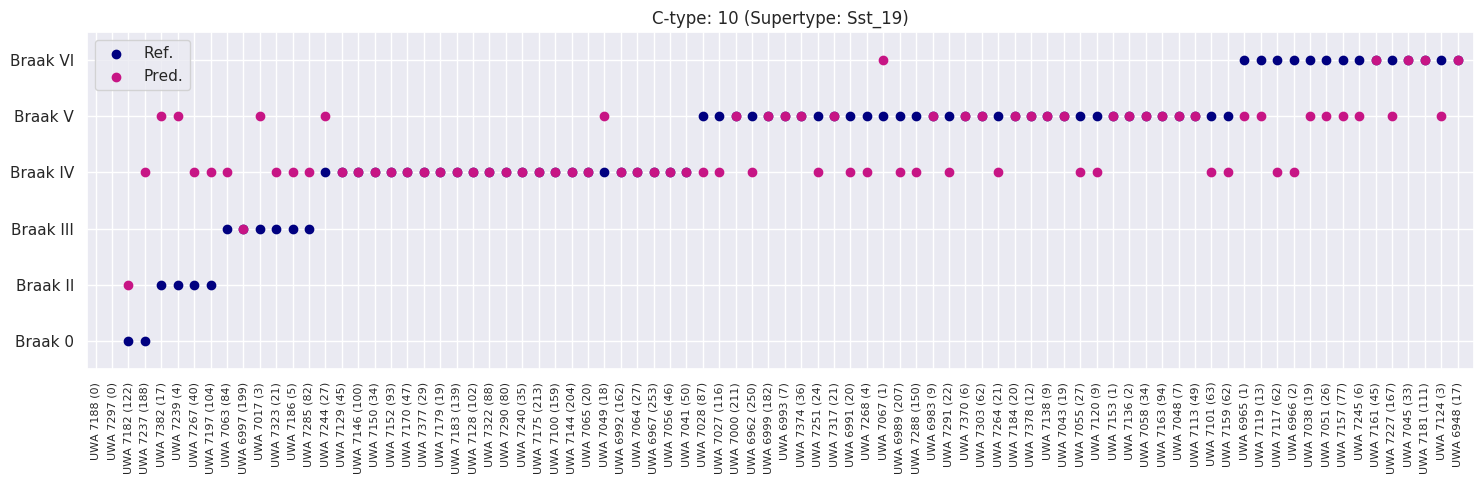

Pearsons correlation: 0.542
15.0 Sst_23
using CPU ...
Total loss: 0.046544384211301804
Total loss: 0.04266859591007233
Total loss: 0.041910906011859574
Total loss: 0.040196881319085755
Total loss: 0.03852301836013794
Total loss: 0.0438606229921182
Total loss: 0.04467737923065821
Total loss: 0.049265372256437935
Total loss: 0.041444054494301476
Total loss: 0.04328413866460323


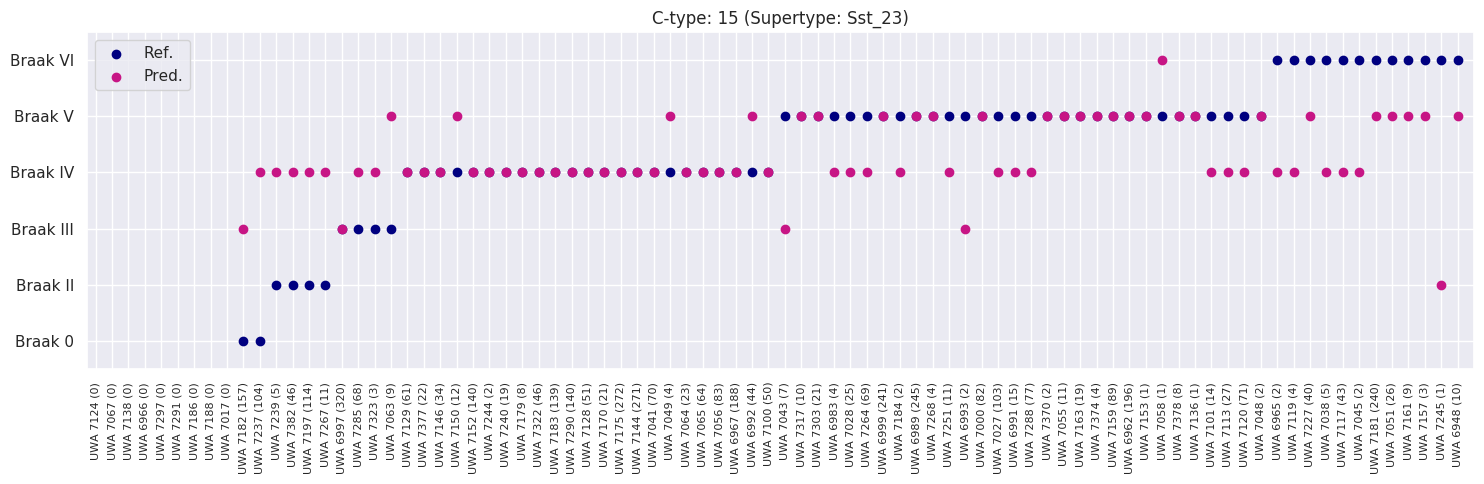

Pearsons correlation: 0.295
18.0 Sst_20
using CPU ...
Total loss: 0.05492213244239489
Total loss: 0.05605924812455972
Total loss: 0.05738067254424095
Total loss: 0.050475639291107655
Total loss: 0.061347433676322304
Total loss: 0.04821448835233847
Total loss: 0.05426748221119245
Total loss: 0.051976244896650314
Total loss: 0.06017868655423323
Total loss: 0.05516712491710981


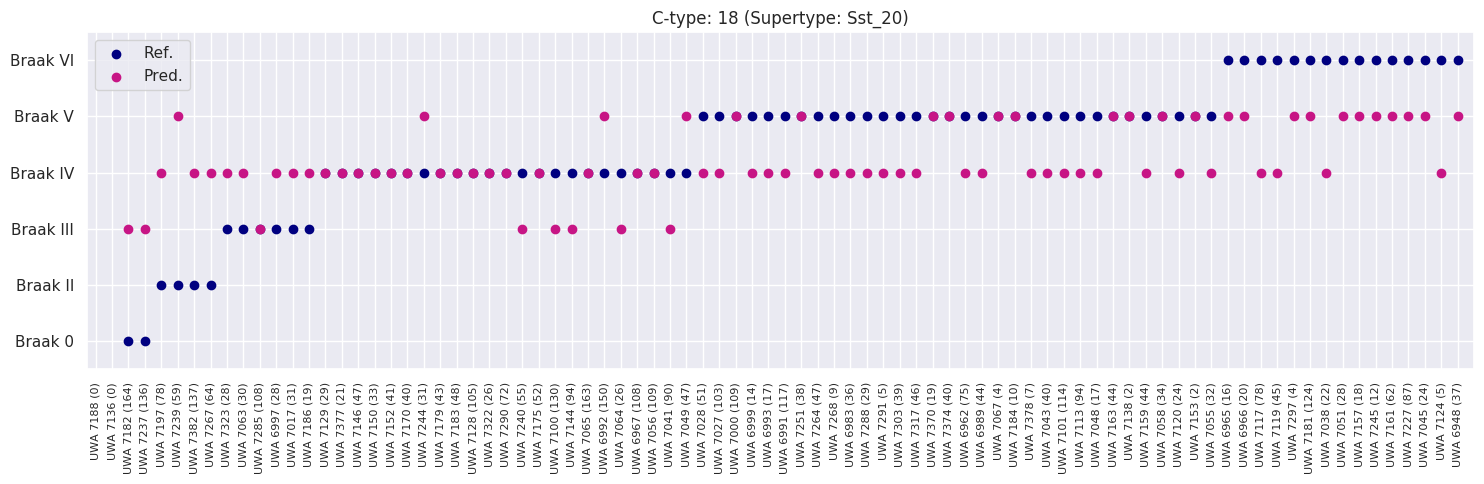

Pearsons correlation: 0.496
20.0 Sst_11
using CPU ...
Total loss: 0.0565102348725001
Total loss: 0.05322853227456411
Total loss: 0.060173568626244865
Total loss: 0.04955948889255524
Total loss: 0.05802960445483526
Total loss: 0.055579078694184623
Total loss: 0.06268787508209546
Total loss: 0.055996435383955635
Total loss: 0.05973317349950472
Total loss: 0.05319038157661756


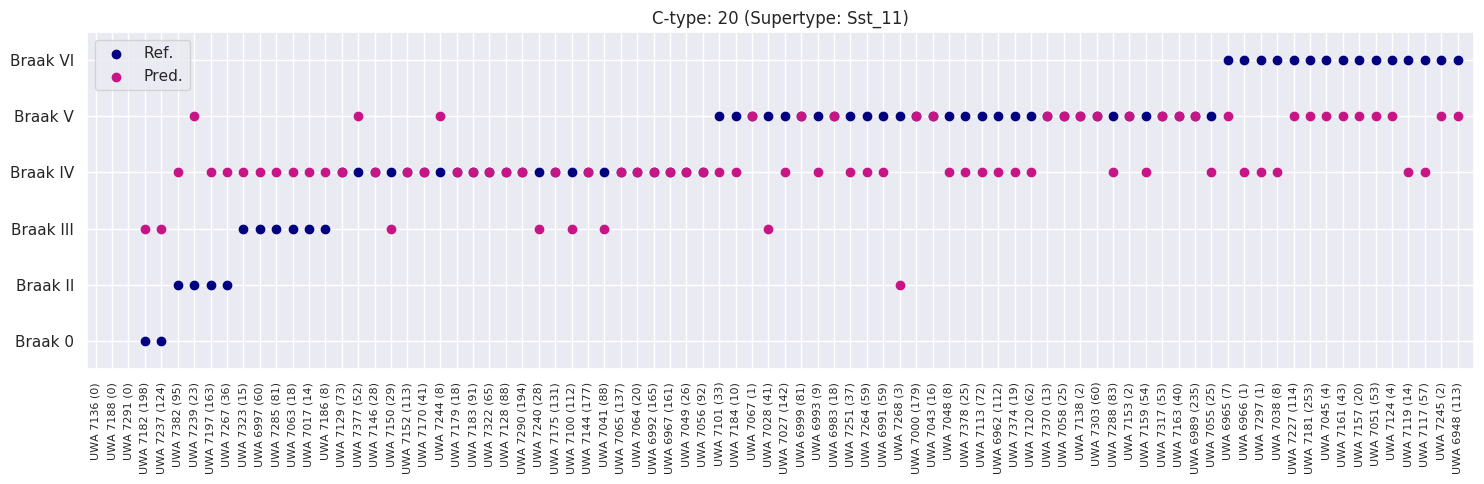

Pearsons correlation: 0.418


In [46]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'braak'

m_ind = []
df_braak = pd.DataFrame()
df_braak['c'] = np.zeros(len(cat))
df_braak['superype'] = np.zeros(len(cat))
df_braak['pearson_corr'] = np.zeros(len(cat))
df_braak['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_moderate] = 1
    metadata = 'caa'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='MediumVioletRed', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data['braak']))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/braak_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_braak['c'][i_c] = int(c)
        df_braak['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_braak['pearson_corr'][i_c] = corr
        df_braak['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [47]:
df_braak

c superype  pearson_corr       mse
0   2.0   Sst_10      0.524391  0.038571
1   5.0    Sst_1      0.430959  0.044938
2   6.0   Sst_19      0.588399  0.035238
3   8.0    Sst_3      0.589470  0.036316
4   9.0    Sst_5      0.410094  0.045366
5  10.0   Sst_19      0.542304  0.037561
6  15.0   Sst_23      0.294593  0.053333
7  18.0   Sst_20      0.495776  0.044390
8  20.0   Sst_11      0.418296  0.049383

2.0 Sst_10
using CPU ...
Total loss: 0.054090713461240135
Total loss: 0.06339127570390701
Total loss: 0.06462223206957181
Total loss: 0.05807634815573692
Total loss: 0.07895927752057712
Total loss: 0.04640270645419756
Total loss: 0.06253036732474963
Total loss: 0.09223537022868793
Total loss: 0.04376372011999289
Total loss: 0.11383122205734253


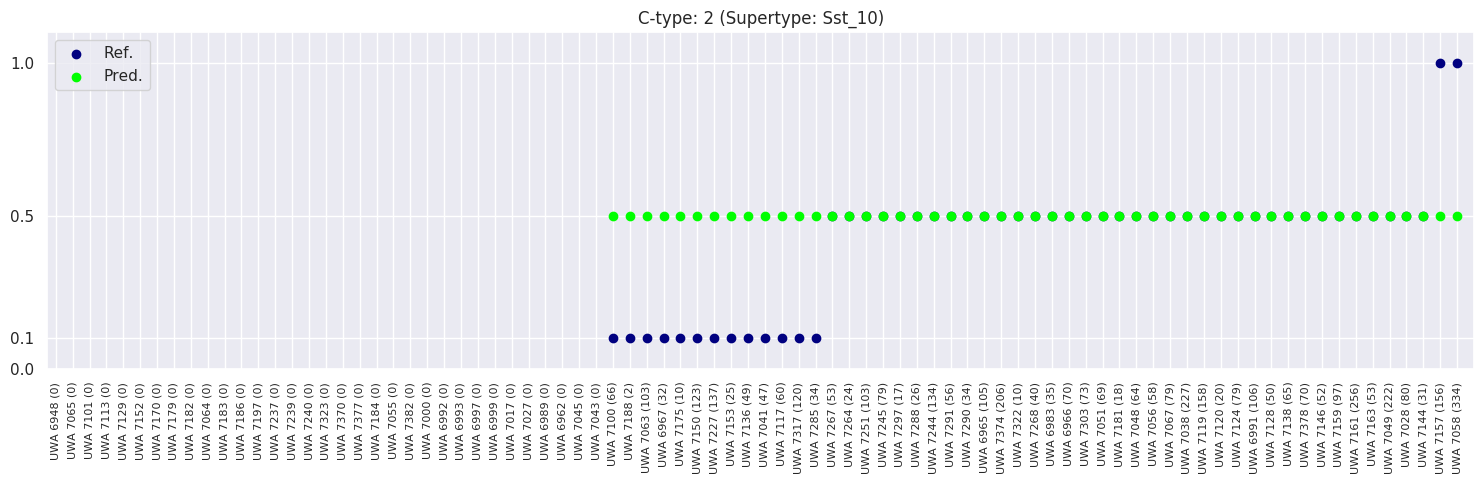

/home/yeganeh/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.000
5.0 Sst_1
using CPU ...
Total loss: 0.04198083654046059
Total loss: 0.06947294622659683
Total loss: 0.0528423972427845
Total loss: 0.046478670090436935
Total loss: 0.04319949448108673
Total loss: 0.04878488555550575
Total loss: 0.05825364962220192
Total loss: 0.046840205788612366
Total loss: 0.06973758339881897
Total loss: 0.06650284677743912


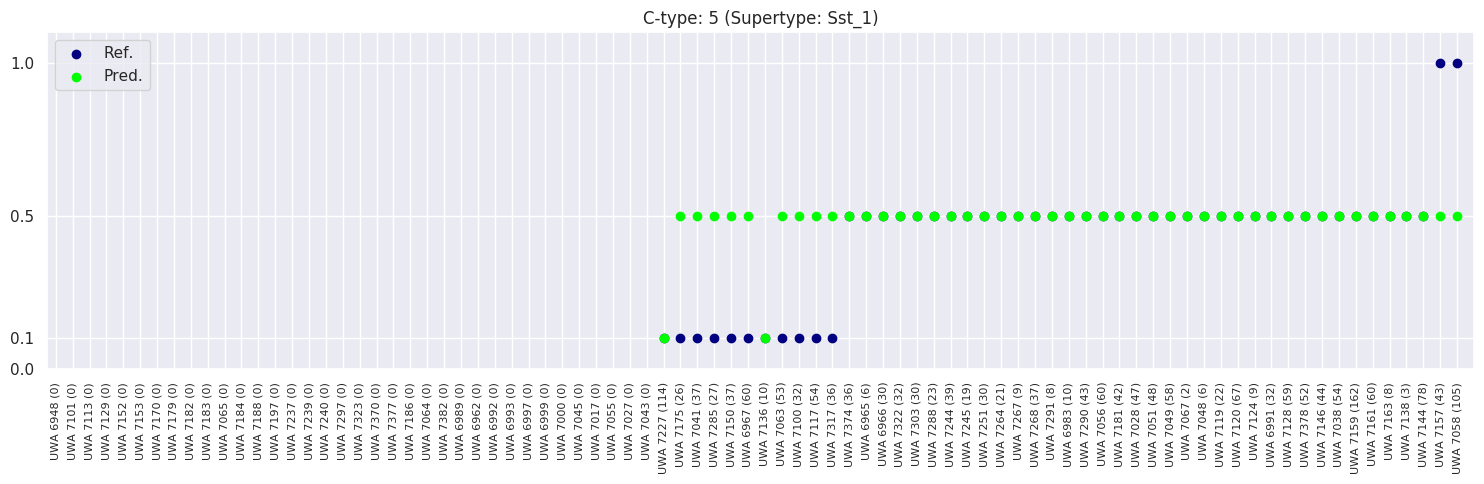

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.335
6.0 Sst_19
using CPU ...
Total loss: 0.047593580558896065
Total loss: 0.054920146241784096
Total loss: 0.04862423986196518
Total loss: 0.04694847948849201
Total loss: 0.04623928479850292
Total loss: 0.0468924380838871
Total loss: 0.04741404019296169
Total loss: 0.046719662845134735
Total loss: 0.049881329759955406
Total loss: 0.048044564202427864


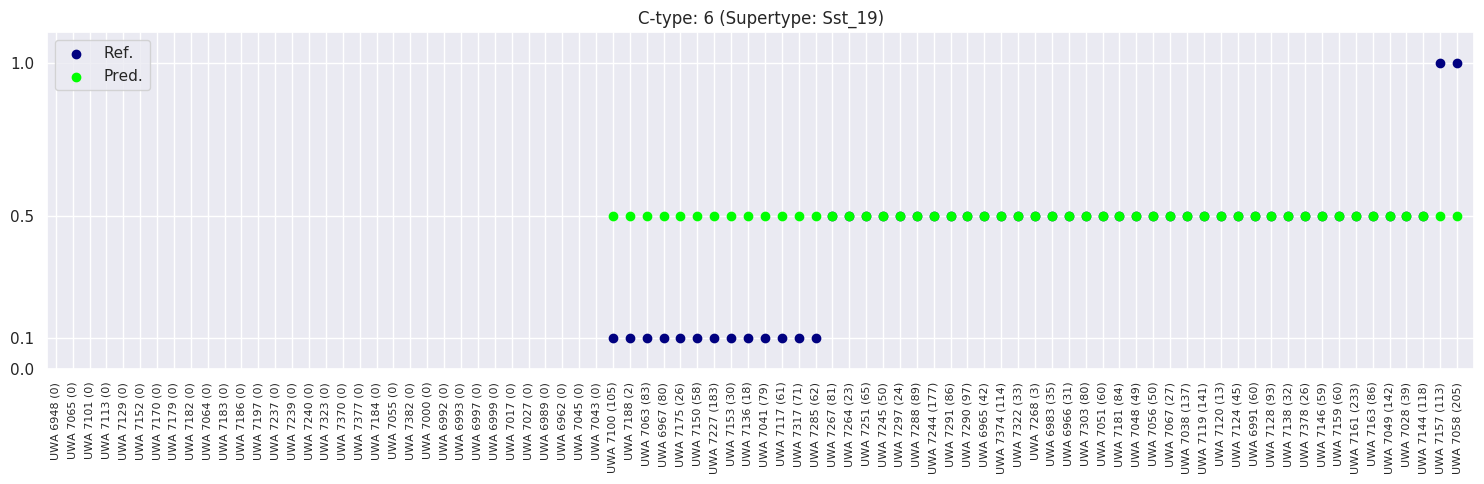

Pearsons correlation: 0.000
8.0 Sst_3
using CPU ...
Total loss: 0.03206278011202812
Total loss: 0.04424619674682617
Total loss: 0.04299358278512955
Total loss: 0.03380373865365982
Total loss: 0.04387887939810753
Total loss: 0.04086310788989067
Total loss: 0.036722853779792786
Total loss: 0.038870133459568024
Total loss: 0.04427066817879677
Total loss: 0.04302399232983589


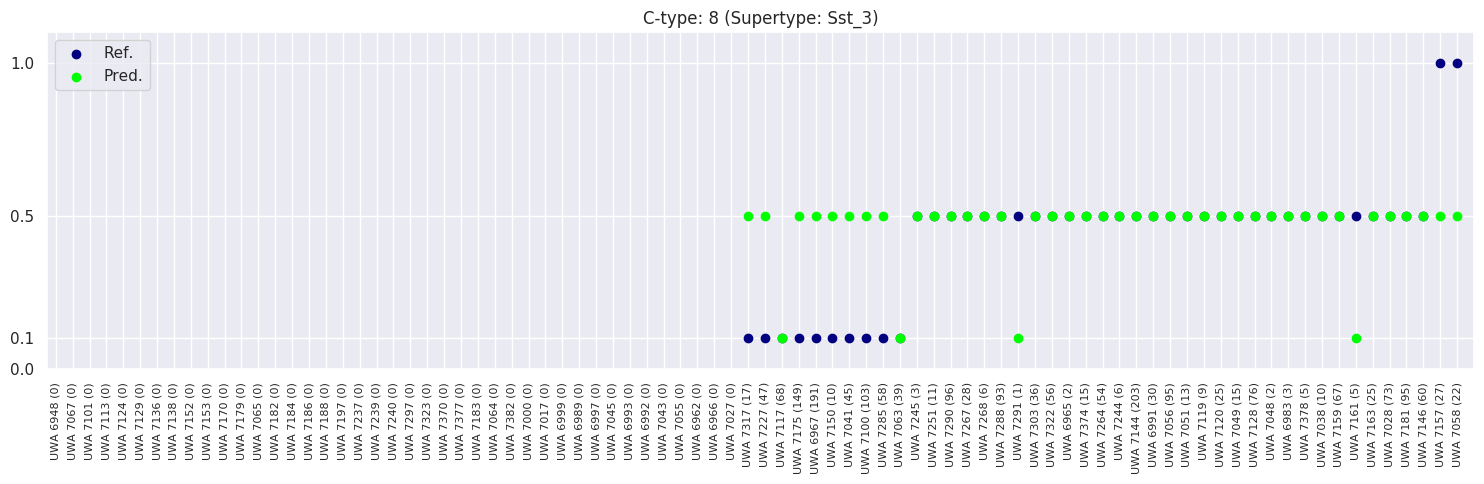

Pearsons correlation: 0.199
9.0 Sst_4
using CPU ...
Total loss: 0.051328444853425026
Total loss: 0.05719596520066261
Total loss: 0.06301331147551537
Total loss: 0.04845433961600065
Total loss: 0.0475902184844017
Total loss: 0.04700682498514652
Total loss: 0.05642924830317497
Total loss: 0.048927320167422295
Total loss: 0.05527207441627979
Total loss: 0.049592141062021255


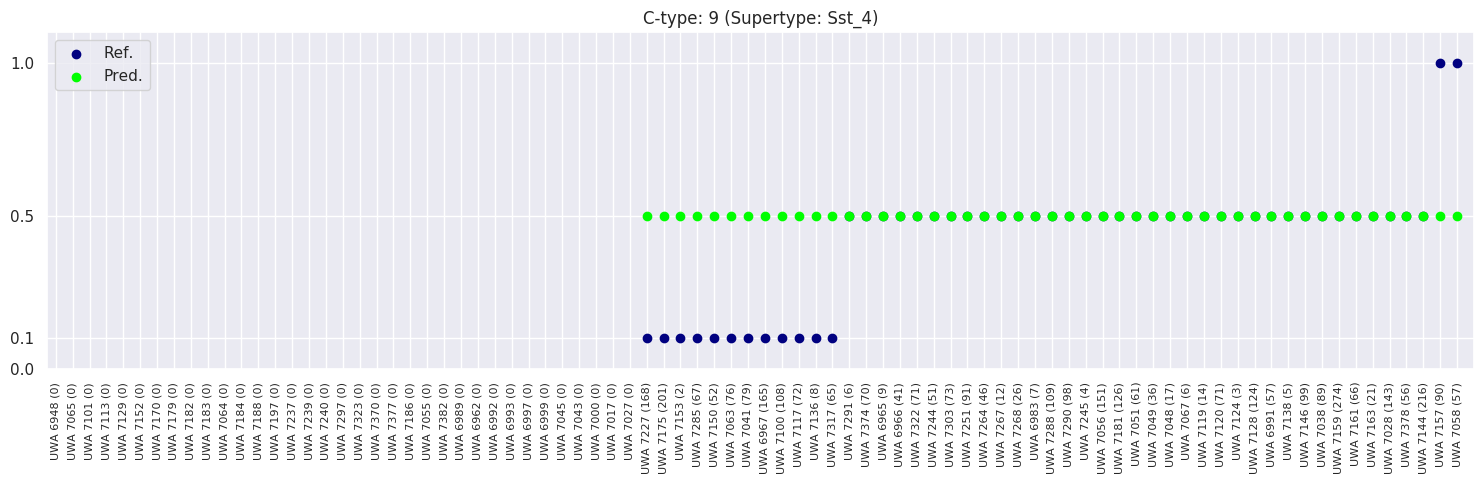

Pearsons correlation: 0.000
10.0 Sst_19
using CPU ...
Total loss: 0.046731432899832726
Total loss: 0.044774580746889114
Total loss: 0.0452182125300169
Total loss: 0.053381845355033875
Total loss: 0.048546621575951576
Total loss: 0.042921895161271095
Total loss: 0.045105379074811935
Total loss: 0.05688820220530033
Total loss: 0.04897782579064369
Total loss: 0.0505731999874115


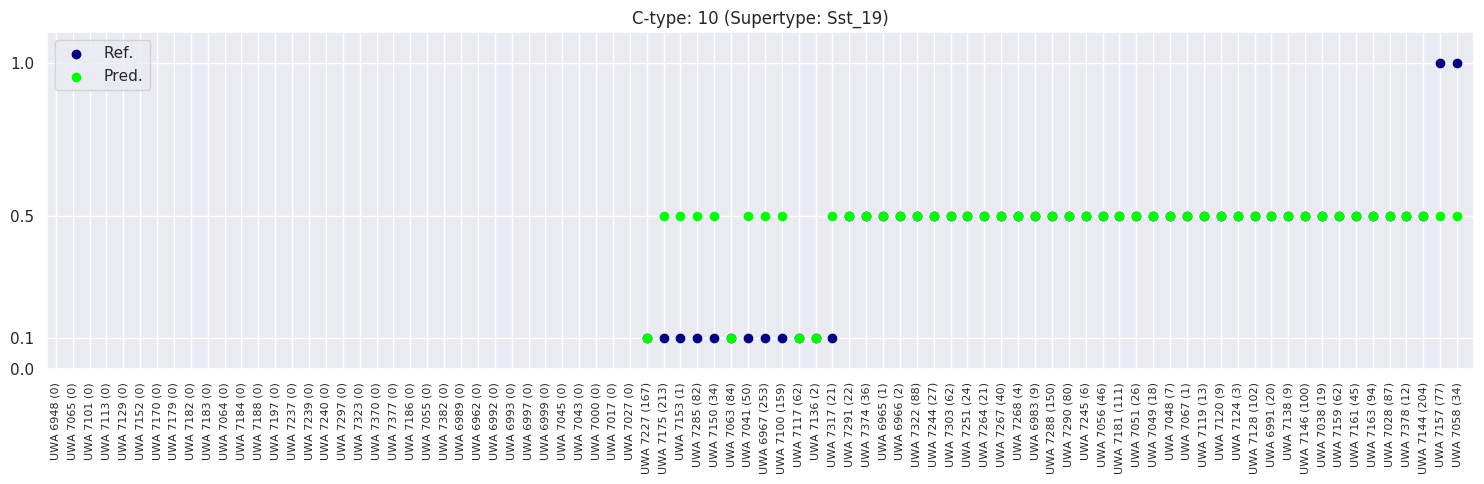

Pearsons correlation: 0.462
15.0 Sst_23
using CPU ...
Total loss: 0.037157285027205944
Total loss: 0.047919075936079025
Total loss: 0.04814440198242664
Total loss: 0.0459901075810194
Total loss: 0.04557501897215843
Total loss: 0.04245210997760296
Total loss: 0.03496905788779259
Total loss: 0.03584877587854862
Total loss: 0.047309624031186104
Total loss: 0.03390615526586771


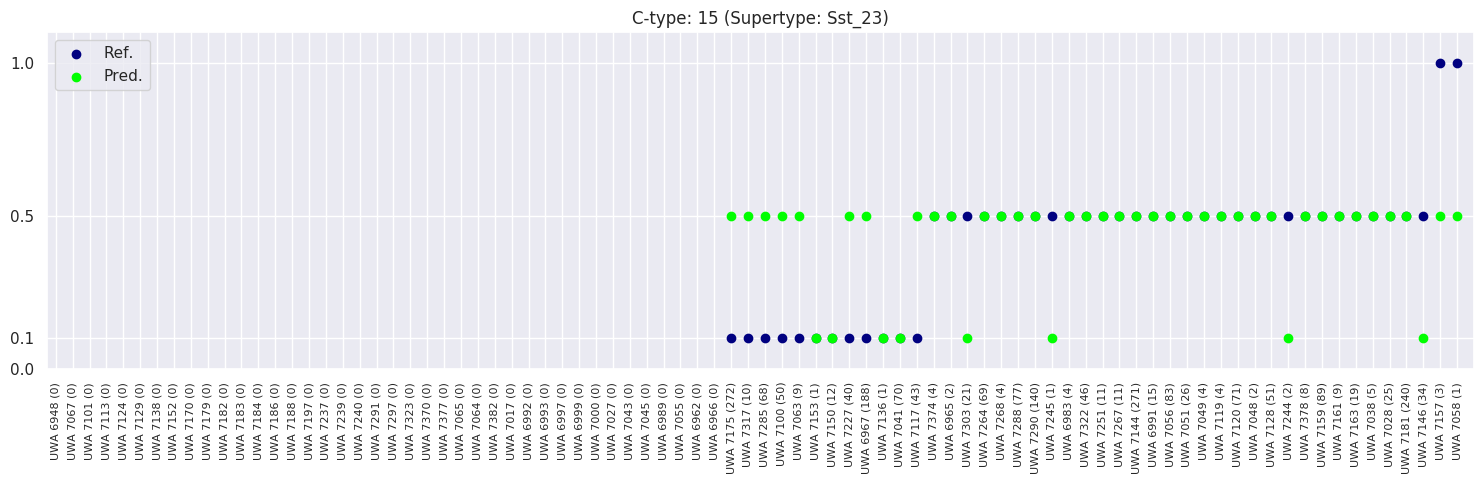

Pearsons correlation: 0.246
18.0 Sst_20
using CPU ...
Total loss: 0.04618835635483265
Total loss: 0.038474882021546364
Total loss: 0.05572575516998768
Total loss: 0.0436013825237751
Total loss: 0.04493202455341816
Total loss: 0.042988214641809464
Total loss: 0.04074753448367119
Total loss: 0.04582771472632885
Total loss: 0.04967833124101162
Total loss: 0.05464712716639042


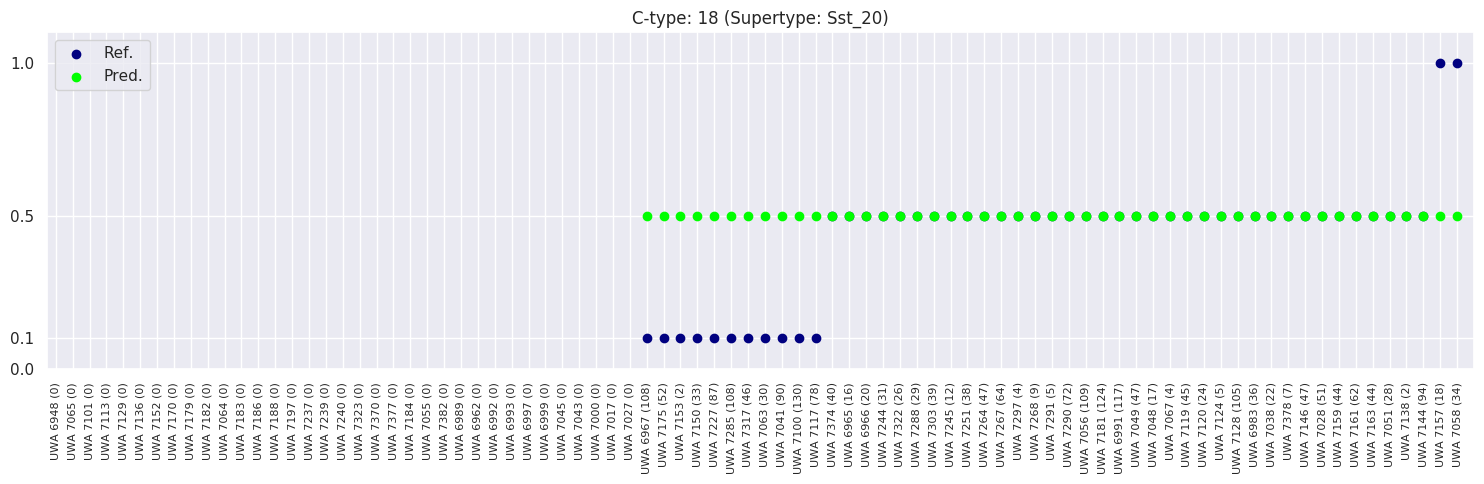

Pearsons correlation: 0.000
20.0 Sst_11
using CPU ...
Total loss: 0.06407716684043407
Total loss: 0.05109425261616707
Total loss: 0.04138935171067715
Total loss: 0.059078337624669075
Total loss: 0.05023888126015663
Total loss: 0.05541973002254963
Total loss: 0.062309784814715385
Total loss: 0.05950973182916641
Total loss: 0.0494429524987936
Total loss: 0.05865976959466934


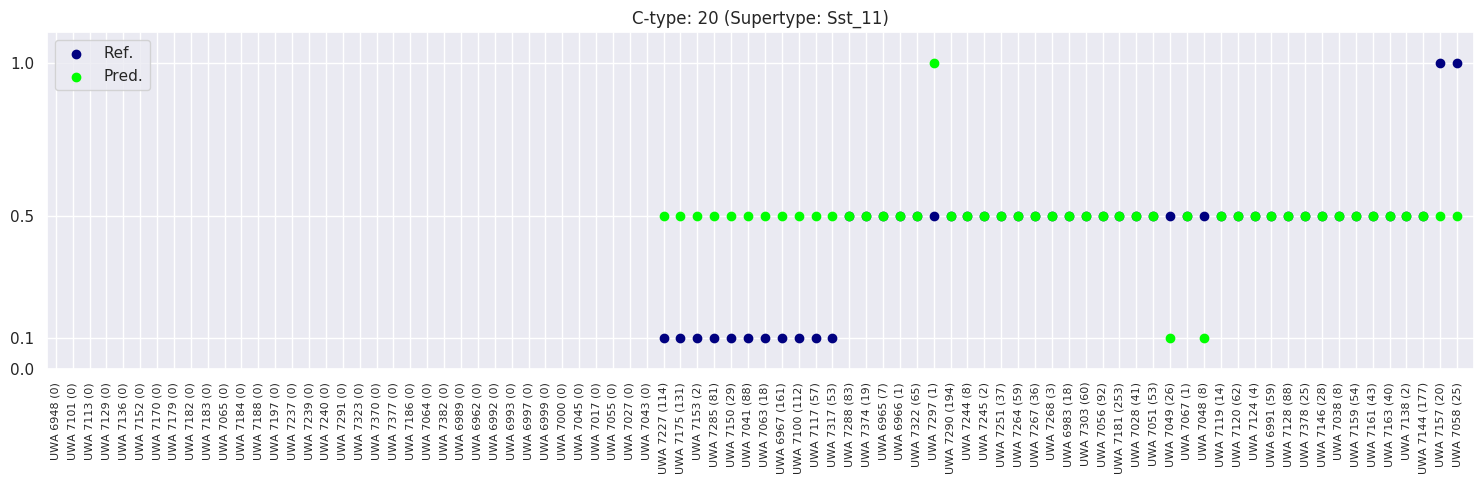

Pearsons correlation: -0.020


In [48]:
seed = 100
kfold = 10
metadata = 'caascore'

m_ind = []
df_caa = pd.DataFrame()
df_caa['c'] = np.zeros(len(cat))
df_caa['superype'] = np.zeros(len(cat))
df_caa['pearson_corr'] = np.zeros(len(cat))
df_caa['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    

arm = 0
if metadata == 'caa':
    indx = np.where(data[metadata] > 0)[0]
else:
    indx = np.arange(len(data[metadata]))

state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, indx]
s_idx = outcome['sample_id'][-1].astype(int)[indx]
categories = np.unique(pred_type)
eval_dict = [[None] for i in categories]

supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
super_type = data['supertype_scANVI'][s_idx]
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = 1. * meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), np.unique(data[metadata]))
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([0.0, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/caascore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_caa['c'][i_c] = int(c)
        df_caa['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        if np.isnan(corr):
            corr = 0.
        print('Pearsons correlation: %.3f' % corr)
        df_caa['pearson_corr'][i_c] = corr
        df_caa['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [49]:
df_caa

c superype  pearson_corr       mse
0   2.0   Sst_10      0.000000  0.050588
1   5.0    Sst_1      0.334647  0.040417
2   6.0   Sst_19      0.000000  0.050588
3   8.0    Sst_3      0.198903  0.048837
4   9.0    Sst_4      0.000000  0.049388
5  10.0   Sst_19      0.461607  0.036327
6  15.0   Sst_23      0.245683  0.055000
7  18.0   Sst_20      0.000000  0.046122
8  20.0   Sst_11     -0.019840  0.058958

2.0 Sst_10
using CPU ...
Total loss: 0.09171113185584545
Total loss: 0.23923349007964134
Total loss: 0.1080598533153534
Total loss: 0.21259772591292858
Total loss: 0.11912517435848713
Total loss: 0.10742334742099047
Total loss: 0.2610946148633957
Total loss: 0.26107194647192955
Total loss: 0.10404094494879246
Total loss: 0.1292389202862978


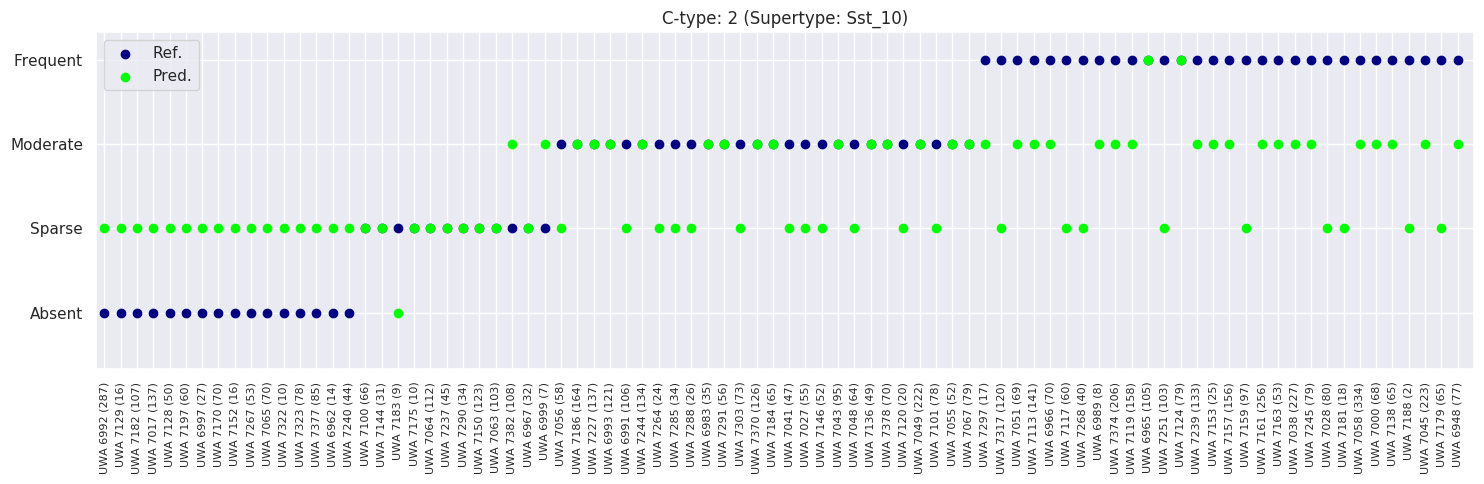

Pearsons correlation: 0.537


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5.0 Sst_1
using CPU ...
Total loss: 0.11568079516291618
Total loss: 0.11536164209246635
Total loss: 0.12163107097148895
Total loss: 0.13371388986706734
Total loss: 0.11914961785078049
Total loss: 0.11303543299436569
Total loss: 0.13598693162202835
Total loss: 0.12121887877583504
Total loss: 0.11454367265105247
Total loss: 0.11095965653657913


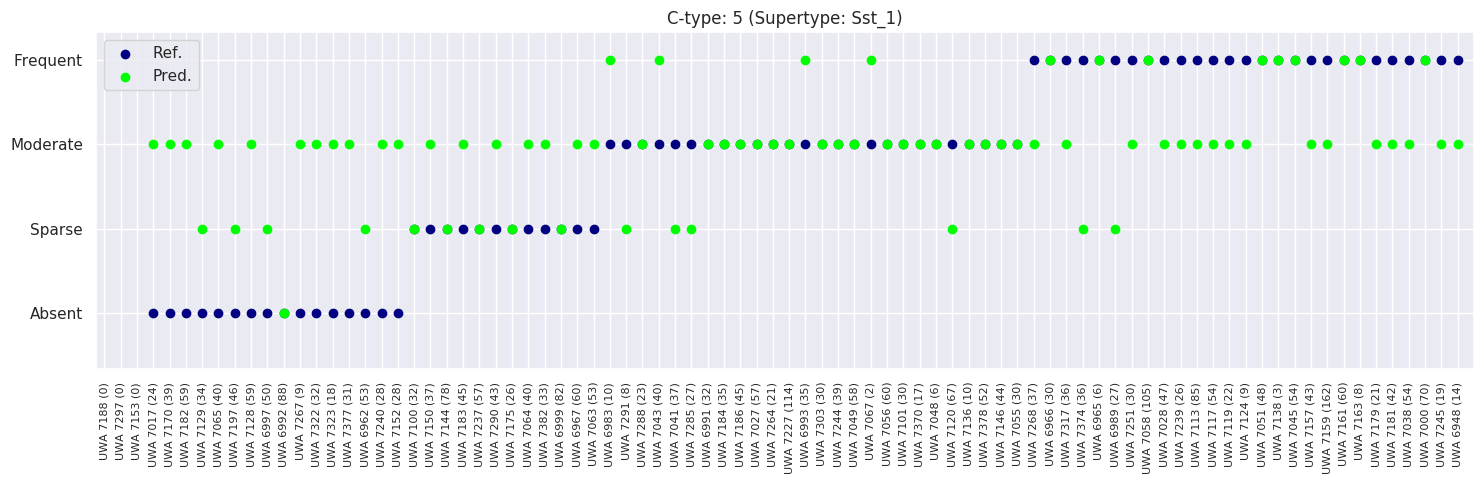

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.412
6.0 Sst_19
using CPU ...
Total loss: 0.09654501639306545
Total loss: 0.09474000055342913
Total loss: 0.09485191479325294
Total loss: 0.0828656479716301
Total loss: 0.09292188659310341
Total loss: 0.08704363089054823
Total loss: 0.08896484225988388
Total loss: 0.07949868682771921
Total loss: 0.09857518877834082
Total loss: 0.09498665388673544


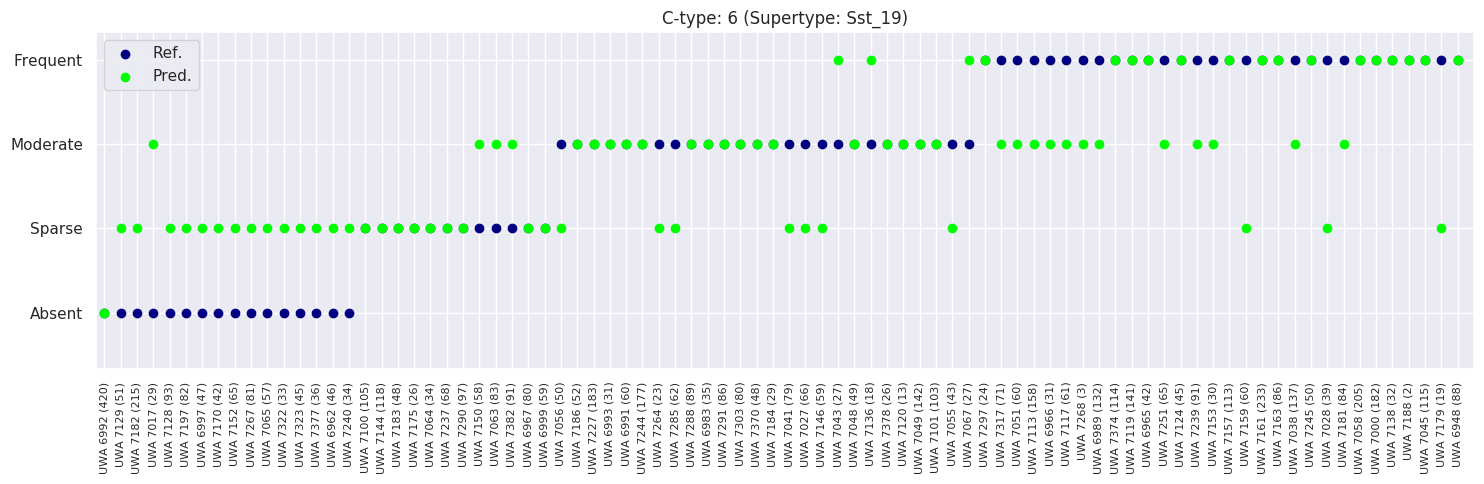

Pearsons correlation: 0.686
8.0 Sst_3
using CPU ...
Total loss: 0.05347692407667637
Total loss: 0.06116950884461403
Total loss: 0.07071615941822529
Total loss: 0.07147281430661678
Total loss: 0.06479146517813206
Total loss: 0.06302007660269737
Total loss: 0.06707770936191082
Total loss: 0.0641186311841011
Total loss: 0.0683648344129324
Total loss: 0.06268277019262314


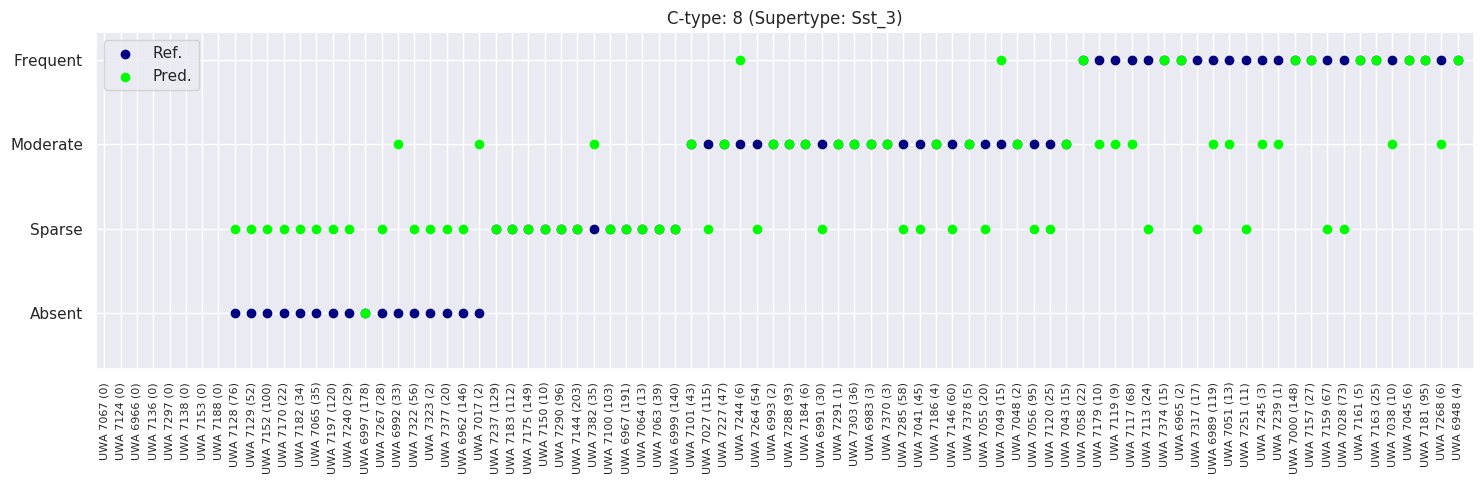

Pearsons correlation: 0.601
9.0 Sst_5
using CPU ...
Total loss: 0.15750320255756378
Total loss: 0.14405783638358116
Total loss: 0.16219361033290625
Total loss: 0.21190028078854084
Total loss: 0.15786630101501942
Total loss: 0.14683978538960218
Total loss: 0.13973166048526764
Total loss: 0.16911582462489605
Total loss: 0.17657660972326994
Total loss: 0.1533818617463112


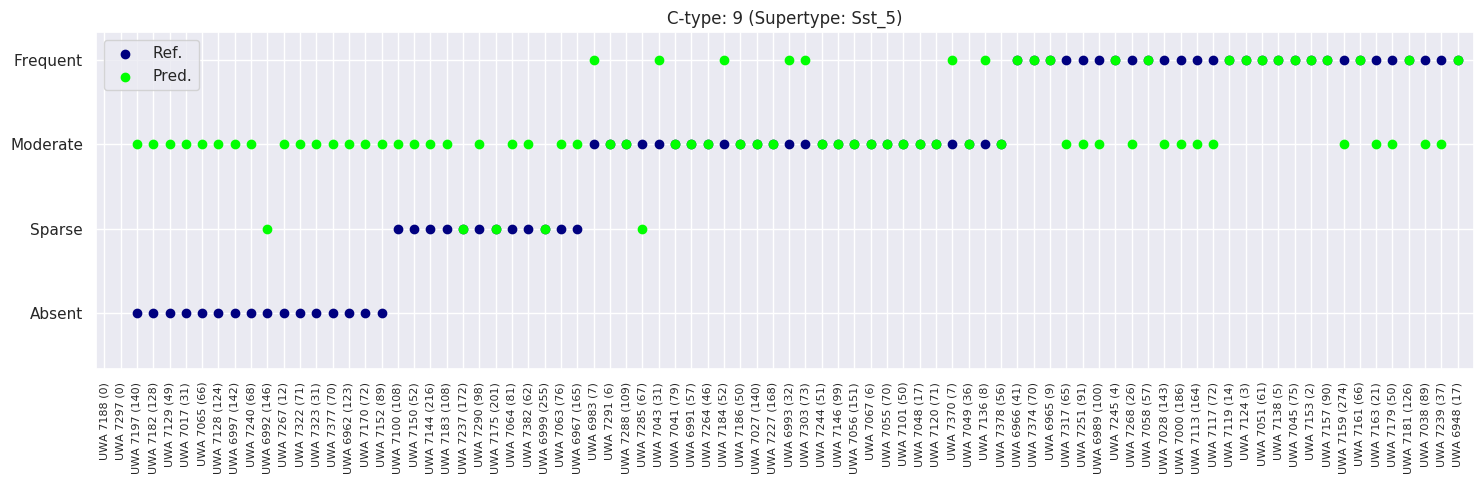

Pearsons correlation: 0.479
10.0 Sst_19
using CPU ...
Total loss: 0.06960253169139226
Total loss: 0.06012755135695139
Total loss: 0.07225460310777028
Total loss: 0.06771168733636539
Total loss: 0.05995960533618927
Total loss: 0.06223970279097557
Total loss: 0.06561385095119476
Total loss: 0.07107404122749965
Total loss: 0.07340795174241066
Total loss: 0.06406928226351738


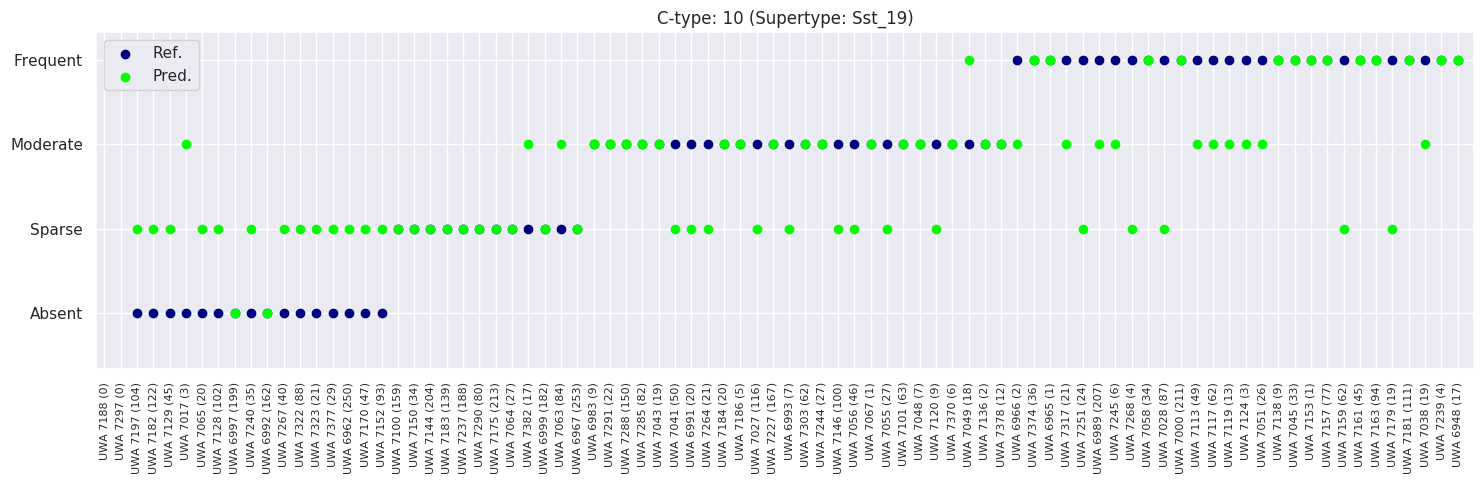

Pearsons correlation: 0.657
15.0 Sst_23
using CPU ...
Total loss: 0.06937553888807695
Total loss: 0.0705843473939846
Total loss: 0.07735254615545273
Total loss: 0.08223533754547437
Total loss: 0.06243088903526465
Total loss: 0.07109101799627145
Total loss: 0.07957846795519193
Total loss: 0.06167325812081496
Total loss: 0.08567197372515996
Total loss: 0.08129980166753133


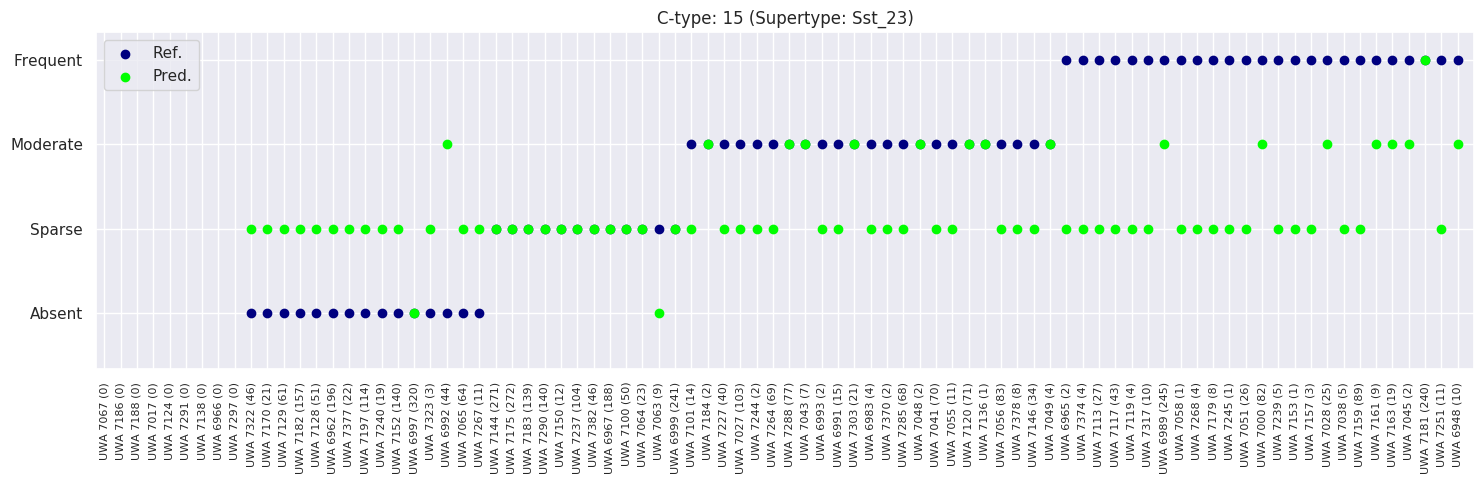

Pearsons correlation: 0.327
18.0 Sst_20
using CPU ...
Total loss: 0.1081502338250478
Total loss: 0.12134858469168346
Total loss: 0.11803784221410751
Total loss: 0.10487705220778783
Total loss: 0.10558686405420303
Total loss: 0.1146157334248225
Total loss: 0.1151685615380605
Total loss: 0.10529548674821854
Total loss: 0.12990102171897888
Total loss: 0.11089736968278885


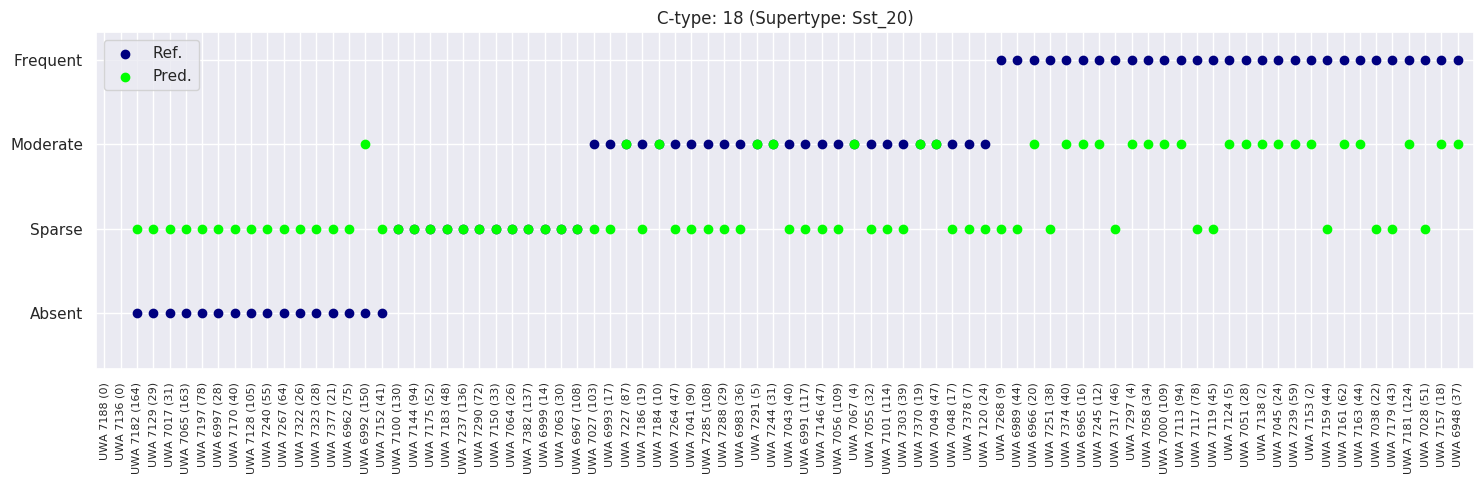

Pearsons correlation: 0.510
20.0 Sst_11
using CPU ...
Total loss: 0.1305364022652308
Total loss: 0.11367786427338918
Total loss: 0.11441856622695923
Total loss: 0.12156836191813152
Total loss: 0.1430072138706843
Total loss: 0.1499046782652537
Total loss: 0.15749919911225638
Total loss: 0.1657885735233625
Total loss: 0.1653567204872767
Total loss: 0.10541242112716039


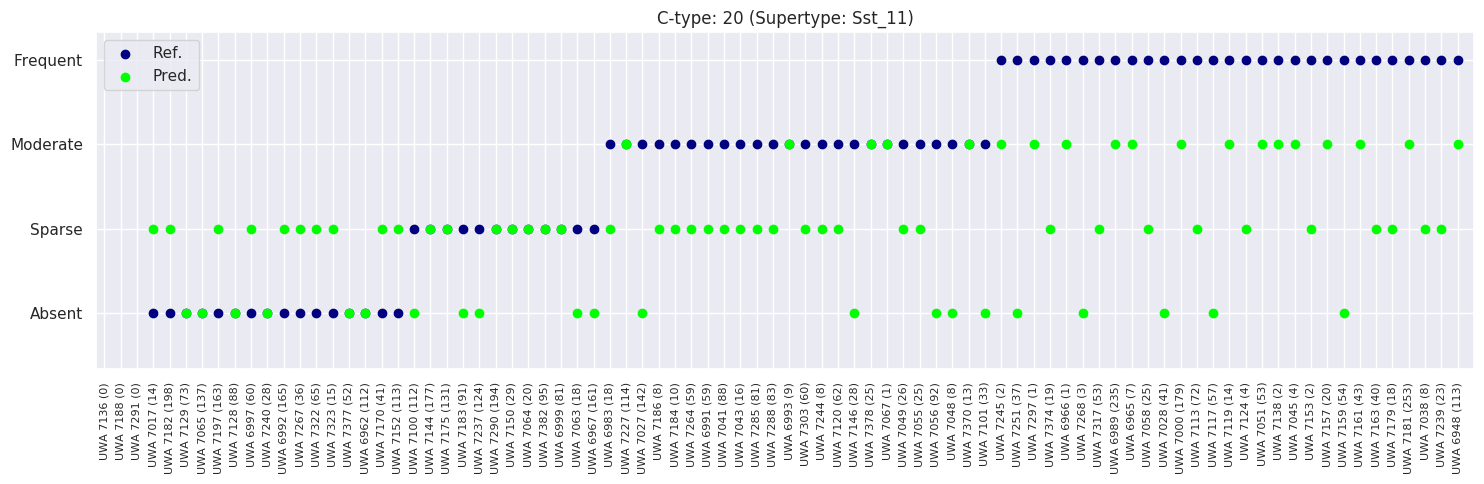

Pearsons correlation: 0.401


In [50]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cscore'

m_ind = []
df_cs = pd.DataFrame()
df_cs['c'] = np.zeros(len(cat))
df_cs['superype'] = np.zeros(len(cat))
df_cs['pearson_corr'] = np.zeros(len(cat))
df_cs['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False

if metadata == 'caascore':
    data['caa'] = np.zeros(len(data[metadata]))
    indx_mild = np.where(data[metadata] == 'Mild')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Severe')[0]
    data['caa'][indx_mild] = 0.1
    data['caa'][indx_moderate] = 0.5
    data['caa'][indx_severe] = 1
    metadata = 'caa'

if metadata == 'cscore':
    data['cs'] = np.zeros(len(data[metadata]))
    indx_absent = np.where(data[metadata] == 'Absent')[0]
    indx_mild = np.where(data[metadata] == 'Sparse')[0]
    indx_moderate = np.where(data[metadata] == 'Moderate')[0]
    indx_severe = np.where(data[metadata] == 'Frequent')[0]
    data['cs'][indx_absent] = .1
    data['cs'][indx_mild] = .4
    data['cs'][indx_moderate] = .7
    data['cs'][indx_severe] = 1
    metadata = 'cs'

if metadata == 'braak':
    data['braak_num'] = np.zeros(len(data[metadata]))
    data['braak_int'] = np.zeros(len(data[metadata]))
    indx_0 = np.where(data[metadata] == 'Braak 0')[0]
    indx_ii = np.where(data[metadata] == 'Braak II')[0]
    indx_iii = np.where(data[metadata] == 'Braak III')[0]
    indx_iv = np.where(data[metadata] == 'Braak IV')[0]
    indx_v = np.where(data[metadata] == 'Braak V')[0]
    indx_vi = np.where(data[metadata] == 'Braak VI')[0]
    data['braak_num'][indx_0] = 0.
    data['braak_num'][indx_ii] = 0.2
    data['braak_num'][indx_iii] = 0.4
    data['braak_num'][indx_iv] = 0.6
    data['braak_num'][indx_v] = 0.8
    data['braak_num'][indx_vi] = 1.
    data['braak_int'][indx_0] = 0
    data['braak_int'][indx_ii] = 2
    data['braak_int'][indx_iii] = 3
    data['braak_int'][indx_iv] = 4
    data['braak_int'][indx_v] = 5
    data['braak_int'][indx_vi] = 6
    metadata = 'braak_num'
    
uniq_donor = np.unique(data['external_donor_name'])

for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx, :]
    y = 1. * meta_y
    donors = tmp_donors
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)

        meta_pred_score = np.array(meta_pred_score)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['Absent', 'Sparse','Moderate', 'Frequent'])
#         plt.xticks(x, uniq_donor[m_indx], rotation=90, fontsize=8)
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cscore_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score > 0]
        y_true = meta_true_mean[meta_pred_score > 0]
        df_cs['c'][i_c] = int(c)
        df_cs['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        if np.isnan(corr):
            corr = 0.
        
        print('Pearsons correlation: %.3f' % corr)
        df_cs['pearson_corr'][i_c] = corr
        df_cs['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [51]:
df_cs

c superype  pearson_corr       mse
0   2.0   Sst_10      0.537444  0.092143
1   5.0    Sst_1      0.411864  0.096667
2   6.0   Sst_19      0.686185  0.058929
3   8.0    Sst_3      0.600511  0.073421
4   9.0    Sst_5      0.479145  0.099878
5  10.0   Sst_19      0.657283  0.064756
6  15.0   Sst_23      0.327495  0.129600
7  18.0   Sst_20      0.509819  0.105366
8  20.0   Sst_11      0.401059  0.164444

2.0 Sst_10
using CPU ...
Total loss: 0.15236353874206543
Total loss: 0.42457127571105957
Total loss: 0.18690846860408783
Total loss: 0.15004070103168488
Total loss: 0.18519015610218048
Total loss: 0.16884848475456238
Total loss: 0.48760223388671875
Total loss: 0.4773806929588318
Total loss: 0.49859267473220825
Total loss: 0.1402622014284134


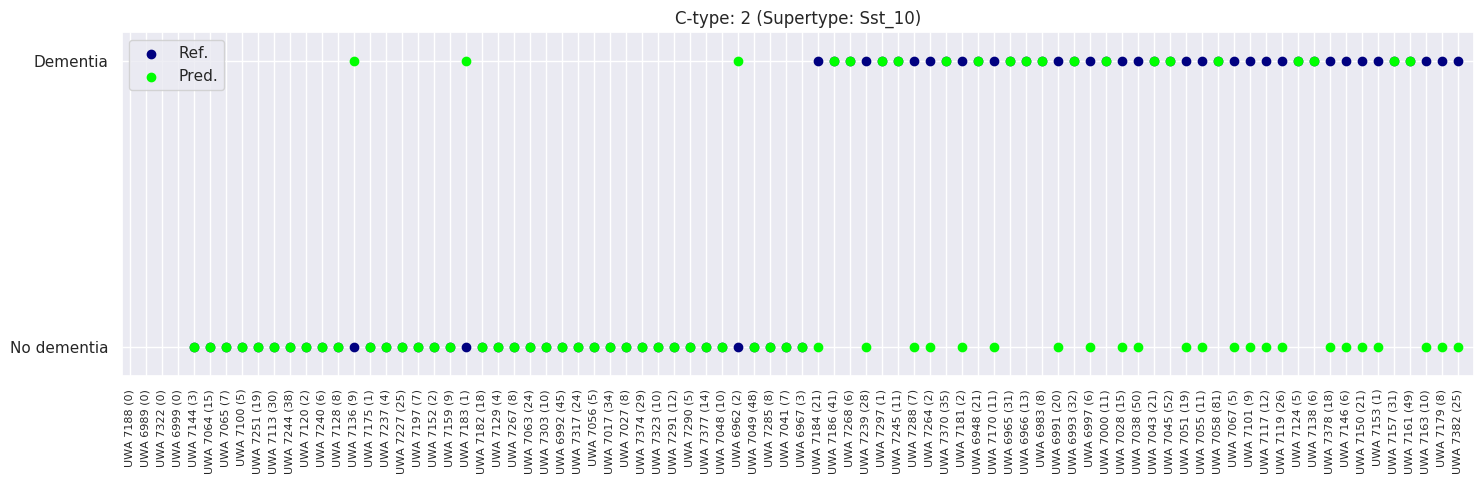

Pearsons correlation: 0.411


/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5.0 Sst_1
using CPU ...
Total loss: 0.20420660078525543
Total loss: 0.20554880797863007
Total loss: 0.20725663006305695
Total loss: 0.22244147956371307
Total loss: 0.16243083775043488
Total loss: 0.1976773738861084
Total loss: 0.20857137441635132
Total loss: 0.16229960322380066
Total loss: 0.18651142716407776
Total loss: 0.164564311504364


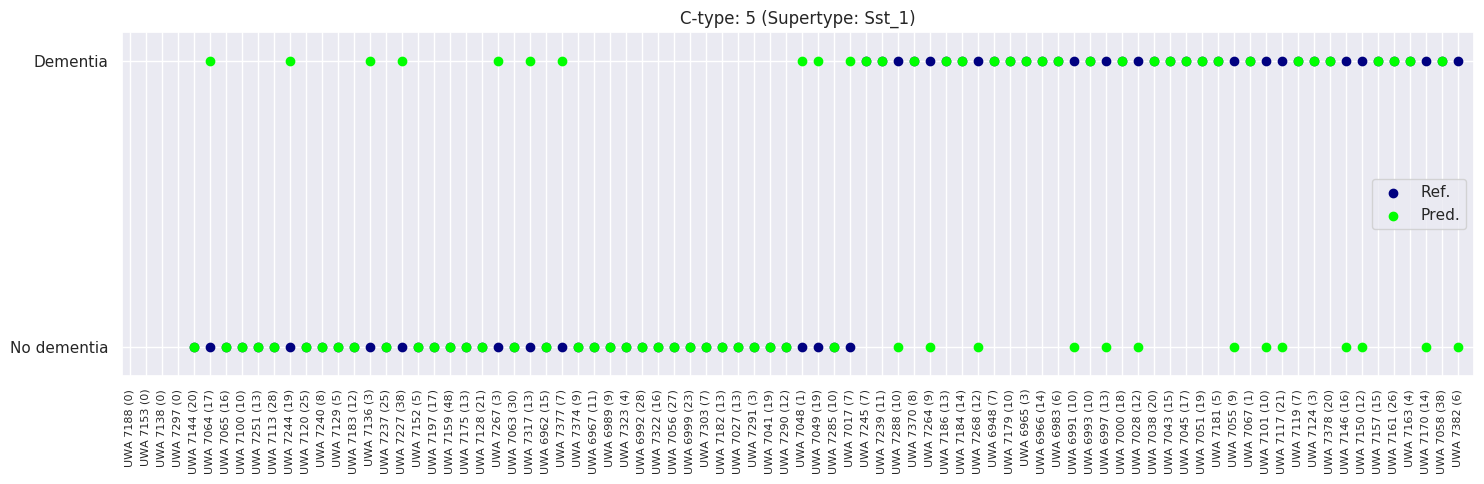

/home/yeganeh/miniconda3/envs/tf14-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Pearsons correlation: 0.423
6.0 Sst_19
using CPU ...
Total loss: 0.16946619004011154
Total loss: 0.135662741959095
Total loss: 0.15109336003661156
Total loss: 0.14553623646497726
Total loss: 0.15589135885238647
Total loss: 0.12414801493287086
Total loss: 0.14555180817842484
Total loss: 0.13046156242489815
Total loss: 0.17925415560603142
Total loss: 0.14394311234354973


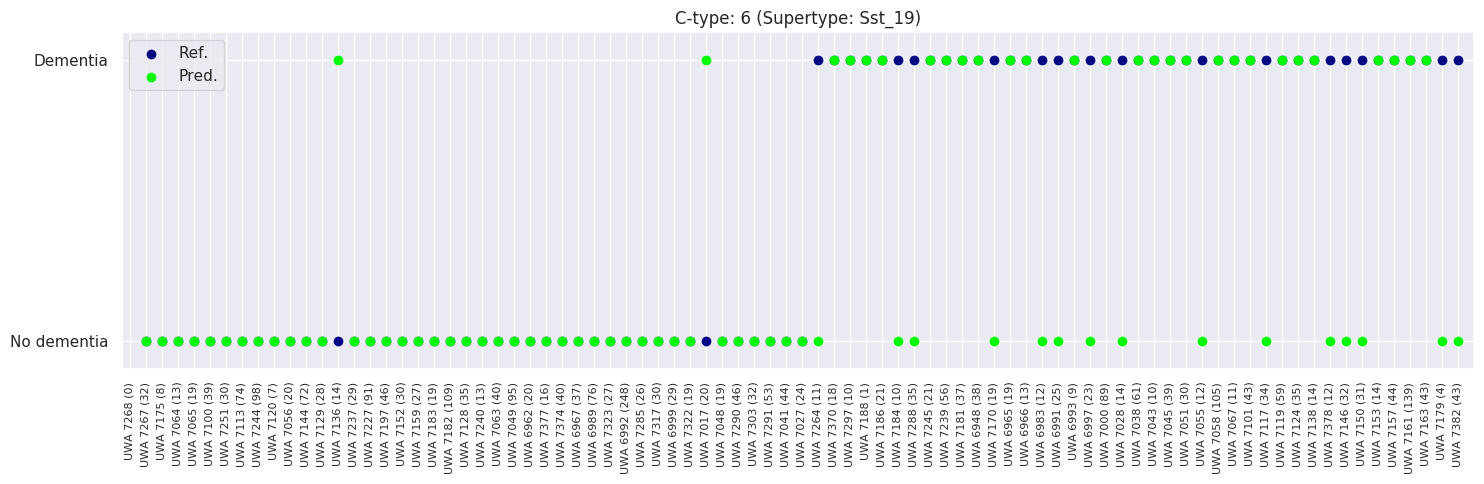

Pearsons correlation: 0.620
8.0 Sst_3
using CPU ...
Total loss: 0.16303886473178864
Total loss: 0.1123304683715105
Total loss: 0.1763661652803421
Total loss: 0.11053384840488434
Total loss: 0.17583897709846497
Total loss: 0.16814839839935303
Total loss: 0.11846670508384705
Total loss: 0.17577724903821945
Total loss: 0.15478267520666122
Total loss: 0.1318400502204895


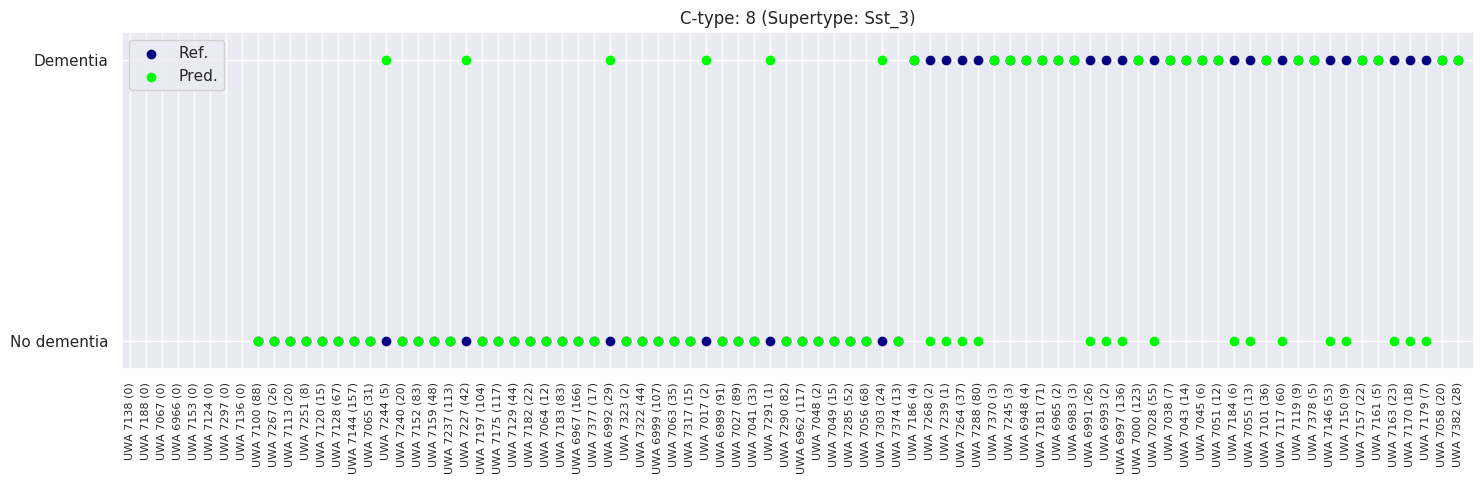

Pearsons correlation: 0.421
9.0 Sst_5
using CPU ...
Total loss: 0.19445645809173584
Total loss: 0.17742224037647247
Total loss: 0.1673889458179474
Total loss: 0.16499163210391998
Total loss: 0.1842256784439087
Total loss: 0.18422874808311462
Total loss: 0.1875743865966797
Total loss: 0.13761574029922485
Total loss: 0.1568768173456192
Total loss: 0.14700151979923248


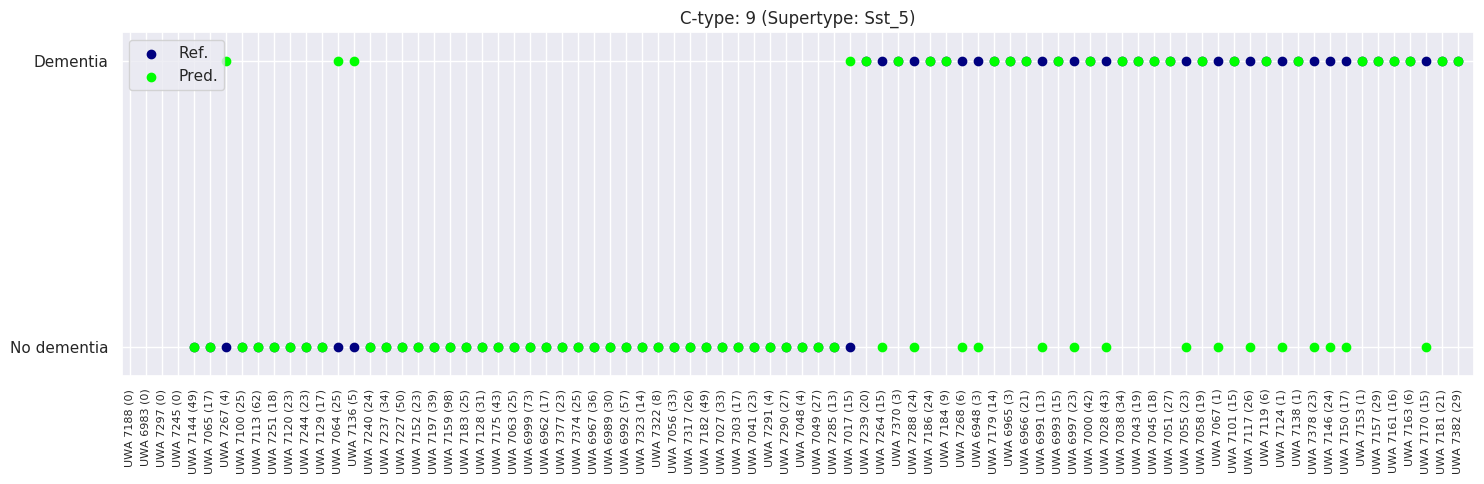

Pearsons correlation: 0.539
10.0 Sst_19
using CPU ...
Total loss: 0.10459257662296295
Total loss: 0.1153968796133995
Total loss: 0.13064010068774223
Total loss: 0.12110039032995701
Total loss: 0.11154447123408318
Total loss: 0.10854974761605263
Total loss: 0.08952726423740387
Total loss: 0.1000235453248024
Total loss: 0.12123553082346916
Total loss: 0.11638699285686016


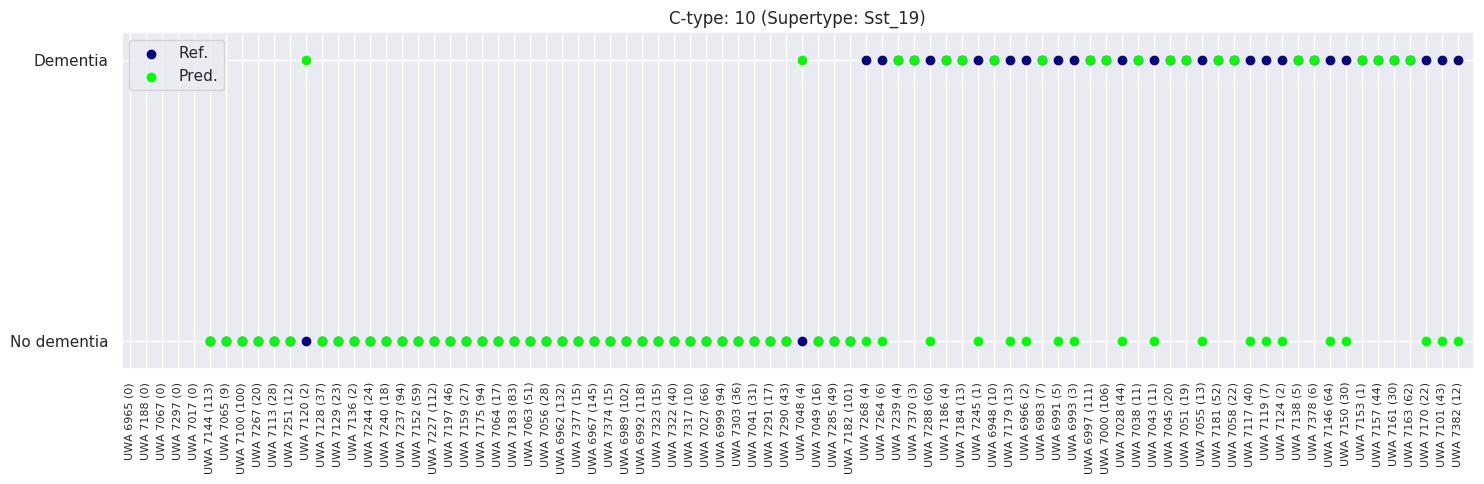

Pearsons correlation: 0.510
15.0 Sst_23
using CPU ...
Total loss: 0.09308703243732452
Total loss: 0.14105863869190216
Total loss: 0.11069698631763458
Total loss: 0.09419886022806168
Total loss: 0.06852302700281143
Total loss: 0.13772636651992798
Total loss: 0.12277927249670029
Total loss: 0.1072799563407898
Total loss: 0.08140137791633606
Total loss: 0.1261158585548401


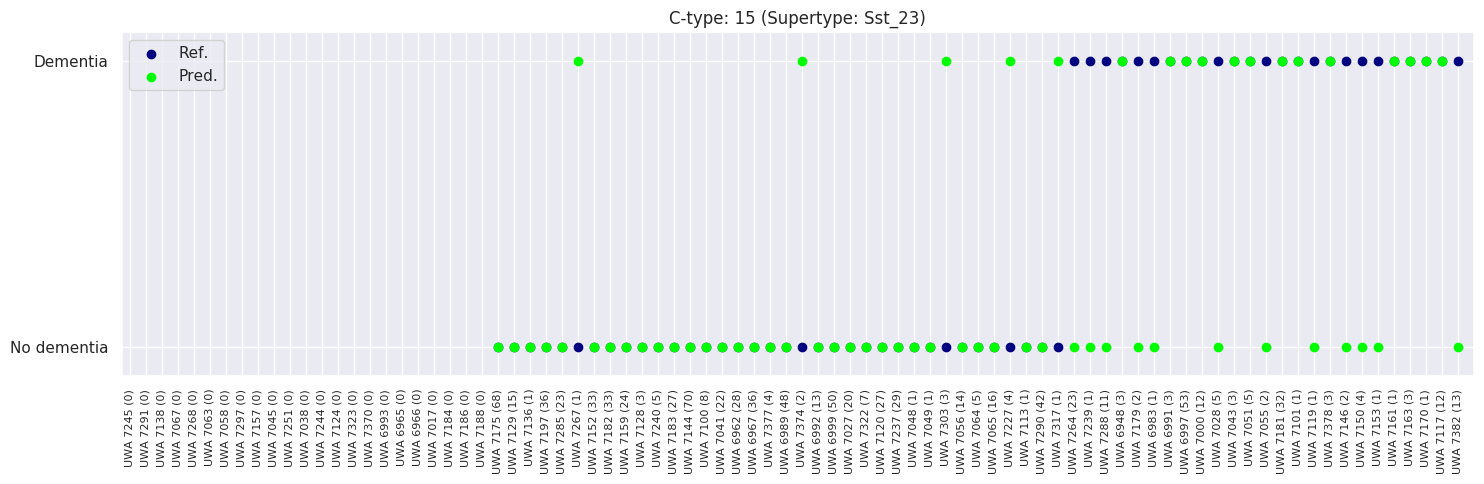

Pearsons correlation: 0.411
18.0 Sst_20
using CPU ...
Total loss: 0.16002732515335083
Total loss: 0.15056301653385162
Total loss: 0.14358912408351898
Total loss: 0.20752757787704468
Total loss: 0.18724022805690765
Total loss: 0.13657620549201965
Total loss: 0.21453602612018585
Total loss: 0.14091843366622925
Total loss: 0.14903002977371216
Total loss: 0.13551844656467438


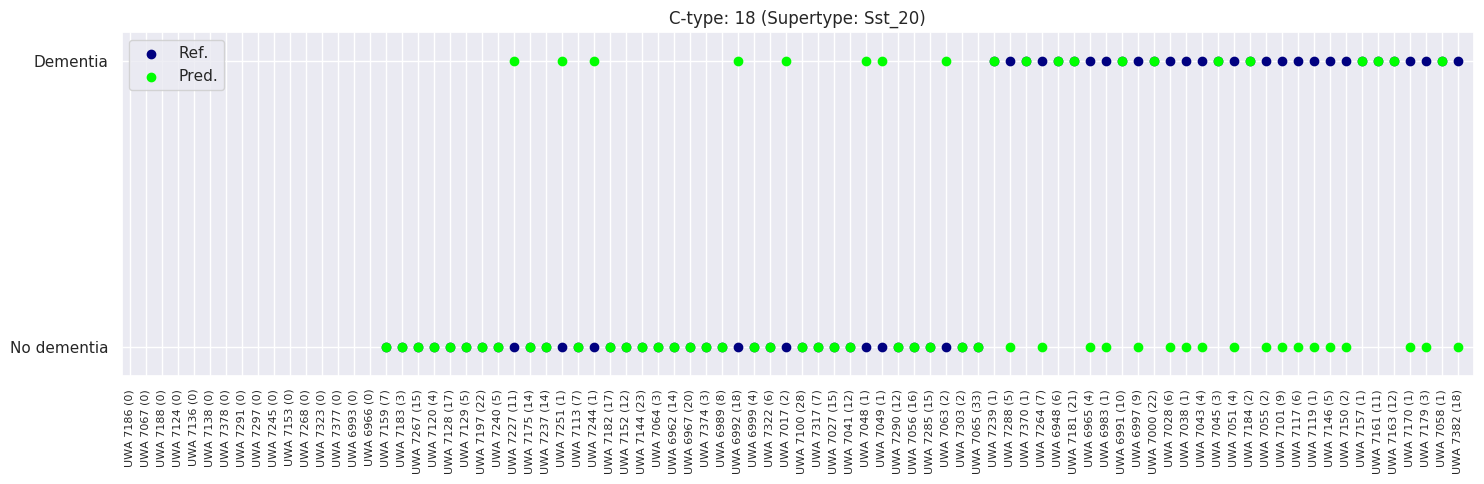

Pearsons correlation: 0.206
20.0 Sst_11
using CPU ...
Total loss: 0.12469541281461716
Total loss: 0.14771674573421478
Total loss: 0.14774799346923828
Total loss: 0.10597488284111023
Total loss: 0.10272110253572464
Total loss: 0.14081653952598572
Total loss: 0.10077571123838425
Total loss: 0.1601494550704956
Total loss: 0.09895091503858566
Total loss: 0.1862659603357315


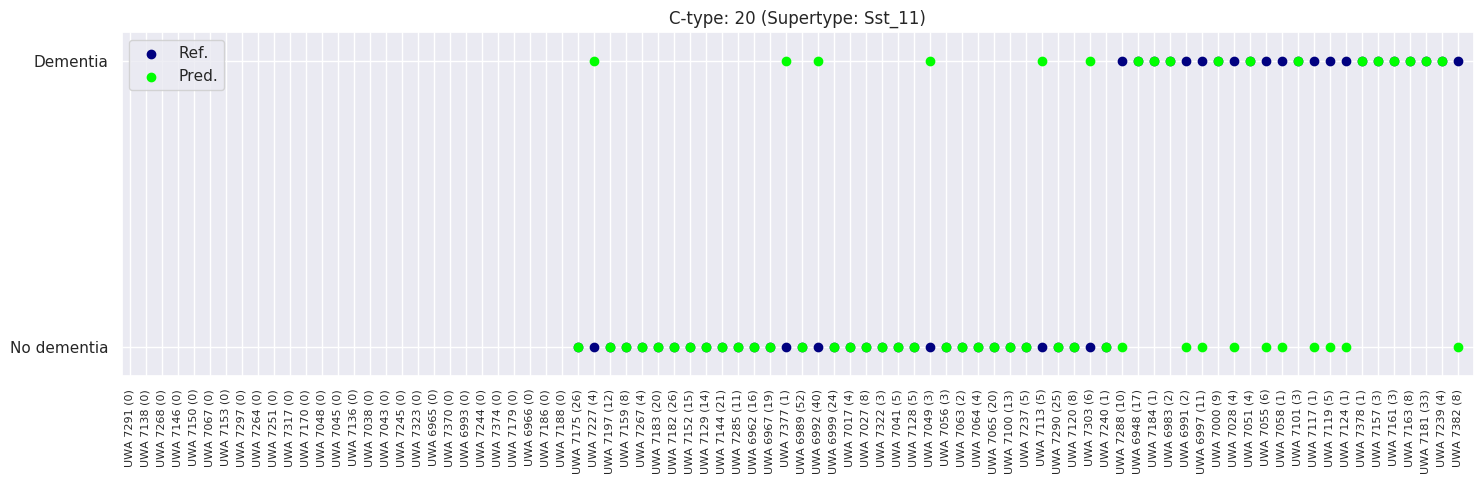

Pearsons correlation: 0.386


In [52]:
arm = 0
seed = 100
kfold = 10
state = outcome['state_mu'][arm, :, :]
pred_type = outcome['pred_label'][-1][arm, :]
s_idx = outcome['sample_id'][-1].astype(int)
cat = np.unique(pred_type)
supertypes = data['supertype_scANVI'][s_idx]
num_types = [sum(supertypes == tt) for tt in np.unique(supertypes)]
metadata = 'cognitive_status_binary'

m_ind = []
df_cs_binary = pd.DataFrame()
df_cs_binary['c'] = np.zeros(len(cat))
df_cs_binary['superype'] = np.zeros(len(cat))
df_cs_binary['pearson_corr'] = np.zeros(len(cat))
df_cs_binary['mse'] = np.zeros(len(cat))

if metadata == 'cognitive_status_binary':
    data['cs_binary'] = np.zeros(len(data[metadata]))
    indx_dem = np.where(data[metadata] == 'Dementia')[0]
    indx_nodem = np.where(data[metadata] == 'No dementia')[0]
    data['cs_binary'][indx_dem] = 1
    data['cs_binary'][indx_nodem] = 0
    metadata = 'cs_binary'
    binary = True
else:
    binary = False


for i_c, c in enumerate(cat):
    eval_dict = []
    error = []
    meta_true = []
    meta_pred = []
    donors_list = []
    idx = np.where(pred_type == c)[0]
    ref_t = data['supertype_scANVI'][s_idx[idx]]
    uniq_ref_t = np.unique(ref_t)
    meta_y = data[metadata][s_idx[idx]]
    tmp_donors = data['external_donor_name'][s_idx[idx]]
    n_types = [sum(ref_t == tt) for tt in uniq_ref_t]
    num_types = [sum(supertypes == tt) for tt in uniq_ref_t]
    norm_count = [i / j for i, j in zip(n_types, num_types)]
    idxx = np.where(ref_t == uniq_ref_t[np.argmax(norm_count)])[0]
    print(c, uniq_ref_t[np.argmax(norm_count)])
    x = state[idx[idxx], :]
    y = 1. * meta_y[idxx]
    donors = tmp_donors[idxx]
    classifier = state_analyzer(saving_folder=saving_folder, device=device)
    kf = KFold(n_splits=kfold, random_state=seed, shuffle=True)
    m = 0
    for train_index, test_index in kf.split(x):
        m += 1
        classifier.init_model(input_dim=state_dim, output_dim=1, lr=0., std=0.1, c=int(c), binary=False, 
                              meta_label=metadata)
        try:
            trained_model = glob.glob(saving_folder + '/model/deepClassifier_' + metadata + 
                                      '_fold_' + str(m) + '_cat_' + str(int(c)) + '*')[0]
            classifier.load_model(trained_model)
#             f = open(saving_folder + '/summary_' + metadata + '_fold_' + str(m) + '_cat_' + str(int(c))+ '.p', "rb")
#             data_dict = pickle.load(f)
#             f.close()
#             indx = data_dict['sample_indx'].astype(int)
            donors_list.append(donors[test_index])
            eval_dict.append(classifier.eval_prediction(x[test_index, :], y[test_index], donors[test_index], 200))
            meta_true.append(eval_dict[-1]['metadata'])
            meta_pred.append(eval_dict[-1]['prediction'])
            error.append(np.mean(np.abs(eval_dict[-1]['metadata'] - eval_dict[-1]['prediction'])))
        except:
            print('quit')
            break

    if m > 1:
        meta_true = np.concatenate(meta_true)
        meta_pred = np.concatenate(meta_pred)
        donors_list = np.concatenate(donors_list)

        meta_true_mean, meta_true_std = [], []
        meta_pred_mean, meta_pred_std = [], []
        xtick = []

        for i_d, dd in enumerate(uniq_donor):
            d_idx = np.where(donors_list==dd)[0]
            xtick.append(f'{dd} ({len(d_idx)})')
            if len(d_idx) > 0:
                meta_true_mean.append(np.median(meta_true[d_idx]))
                meta_true_std.append(np.std(meta_true[d_idx]))
                meta_pred_mean.append(np.median(meta_pred[d_idx]))
                meta_pred_std.append(np.std(meta_pred[d_idx]))
            else:
                meta_true_mean.append(-10)
                meta_true_std.append(0)
                meta_pred_mean.append(-10)
                meta_pred_std.append(0)

        meta_true_mean = np.array(meta_true_mean)
        meta_true_std = np.array(meta_true_std)
        meta_pred_mean = np.array(meta_pred_mean)
        meta_pred_std = np.array(meta_pred_std)

        values = np.unique(meta_true_mean)
        meta_pred_score = []
        for p_m in meta_pred_mean:
            if p_m > 0:
                dist = (p_m - values)**2
                meta_pred_score.append(values[np.argmin(dist)])
            else:
                meta_pred_score.append(p_m)
                    

        meta_pred_score = np.array(meta_pred_score)
        color = np.array(color)
        m_indx = np.argsort(meta_true_mean)
        x = np.arange(len(uniq_donor))
        plt.figure(figsize=[15, 5],dpi=100)
        plt.scatter(x, meta_true_mean[m_indx], color='Navy', label='Ref.')
        plt.scatter(x, meta_pred_score[m_indx], color='Lime', label='Pred.')
        plt.yticks(np.unique(data[metadata]), ['No dementia', 'Dementia'])
        plt.xticks(x, np.array(xtick)[m_indx], rotation=90, fontsize=8)
        plt.xlim([-.5, np.max(x)+1])
        plt.ylim([-0.1, np.max(y)+0.1*np.max(y)])
        plt.legend()
        plt.title(f'C-type: {int(c)} (Supertype: {uniq_ref_t[np.argmax(norm_count)]})')
        plt.tight_layout()
        stype = uniq_ref_t[np.argmax(n_types)]
        plt.savefig(saving_folder + '/cs_binary_' + str(int(c)) + '_' + stype[stype.find('_')+1:] + '_arm_' + str(arm) + '.png', dpi=600)
        plt.show()
        
        y_pred = meta_pred_score[meta_pred_score >= 0]
        y_true = meta_true_mean[meta_pred_score >= 0]
        df_cs_binary['c'][i_c] = int(c)
        df_cs_binary['superype'][i_c] = uniq_ref_t[np.argmax(norm_count)]
        corr, _ = pearsonr(y_true, y_pred)
        print('Pearsons correlation: %.3f' % corr)
        df_cs_binary['pearson_corr'][i_c] = corr
        df_cs_binary['mse'][i_c] = np.mean((y_pred - y_true)**2)

In [53]:
df_cs_binary

c superype  pearson_corr       mse
0   2.0   Sst_10      0.411357  0.325000
1   5.0    Sst_1      0.422589  0.287500
2   6.0   Sst_19      0.620218  0.204819
3   8.0    Sst_3      0.420660  0.289474
4   9.0    Sst_5      0.538627  0.237500
5  10.0   Sst_19      0.510326  0.265823
6  15.0   Sst_23      0.410963  0.278689
7  18.0   Sst_20      0.206474  0.382353
8  20.0   Sst_11      0.385860  0.285714